In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weatherAus = pd.read_csv("Dataset/weatherAUS.csv")
weatherAus.isnull().sum(), weatherAus.shape

(Date                 0
 Location             0
 MinTemp           1485
 MaxTemp           1261
 Rainfall          3261
 Evaporation      62790
 Sunshine         69835
 WindGustDir      10326
 WindGustSpeed    10263
 WindDir9am       10566
 WindDir3pm        4228
 WindSpeed9am      1767
 WindSpeed3pm      3062
 Humidity9am       2654
 Humidity3pm       4507
 Pressure9am      15065
 Pressure3pm      15028
 Cloud9am         55888
 Cloud3pm         59358
 Temp9am           1767
 Temp3pm           3609
 RainToday         3261
 RainTomorrow      3267
 dtype: int64,
 (145460, 23))

## Data Preprocessing

In [3]:
weatherAus = weatherAus[weatherAus['RainTomorrow'].notna() & weatherAus['RainToday'].notna() & weatherAus['Sunshine'].notna()]

### Categorical Data

In [4]:
weatherAus['Date'] = pd.to_datetime(weatherAus['Date'])
df0 = weatherAus.copy()
weatherAus = weatherAus.drop('RainTomorrow',axis=1)
weatherAus['Month'] = weatherAus['Date'].dt.month
weatherAus['RainTomorrow'] = df0['RainTomorrow'] 

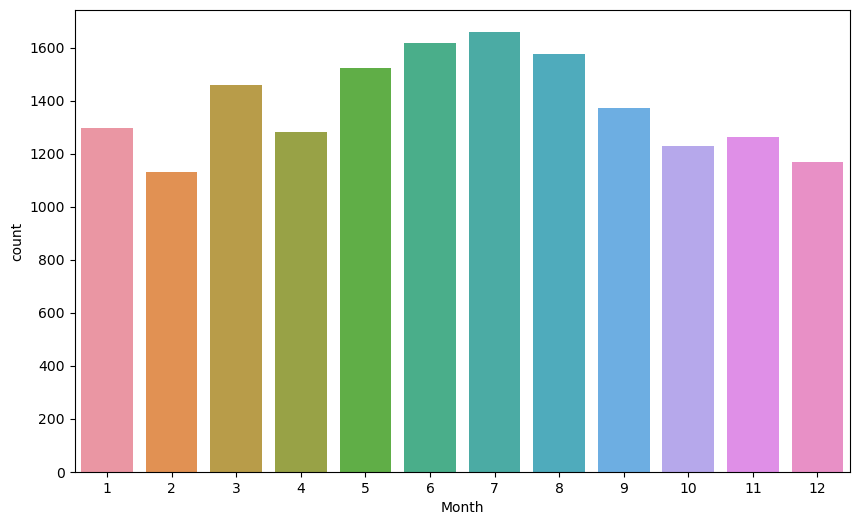

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(data=weatherAus[weatherAus['RainTomorrow']=='Yes'],x='Month');

There are monts where the chances of raining increases, specially during summer

Location and Wind Directions are features that normaly have something to do with rains

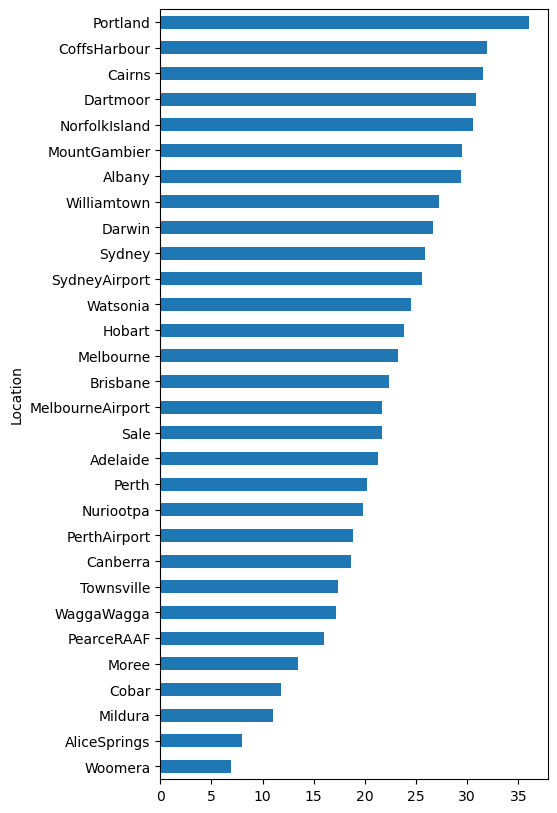

In [6]:
rainLoc_df=pd.crosstab(weatherAus['Location'],weatherAus['RainTomorrow']) 
# getting percentage of raining days and non raining days for each city 
rainLoc_df=rainLoc_df/rainLoc_df.transpose().sum().values.reshape((-1, 1))*100
rainLoc_sorted = rainLoc_df.sort_values(by='Yes',ascending=True )
rainLoc_sorted.Yes.plot(kind="barh",figsize=(5,10));

In [7]:
windgust_df=pd.crosstab(weatherAus['WindGustDir'],weatherAus['RainTomorrow']) 
windgust_df=windgust_df/windgust_df.transpose().sum().values.reshape((-1, 1))*100
windgust_df = windgust_df.sort_values(by='Yes',ascending=True )

In [8]:
winddir9am_df=pd.crosstab(weatherAus['WindDir9am'],weatherAus['RainTomorrow']) 
winddir9am_df=winddir9am_df/winddir9am_df.transpose().sum().values.reshape((-1, 1))*100
winddir9am_df = winddir9am_df.sort_values(by='Yes',ascending=True )

In [9]:
winddir3pm_df=pd.crosstab(weatherAus['WindDir3pm'],weatherAus['RainTomorrow']) 
winddir3pm_df=winddir3pm_df/winddir3pm_df.transpose().sum().values.reshape((-1, 1))*100
winddir3pm_df = winddir3pm_df.sort_values(by='Yes',ascending=True )

<AxesSubplot:>

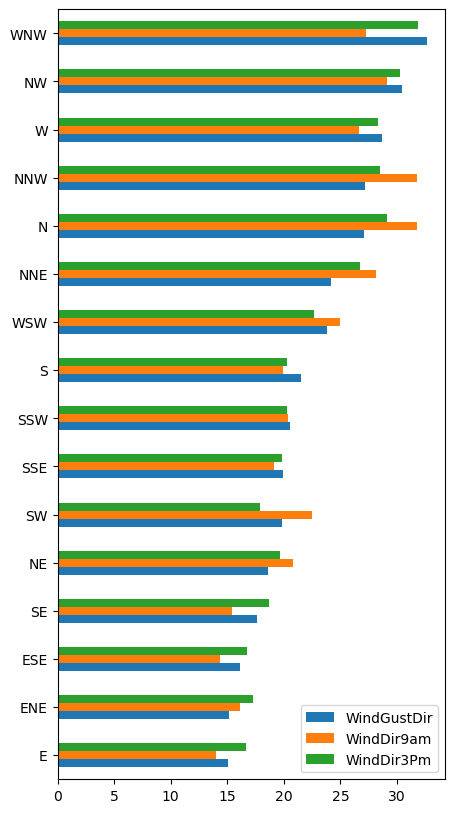

In [10]:
windDirs = pd.concat([windgust_df.Yes, winddir9am_df.Yes, winddir3pm_df.Yes], axis=1)
windDirs.columns = ['WindGustDir','WindDir9am','WindDir3Pm']
windDirs.plot(kind="barh",figsize=(5,10))

In [11]:
location_label_maping={}
for n, location in enumerate(rainLoc_sorted.index):
    location_label_maping[location] = n
weatherAus['Location'] = weatherAus['Location'].map(location_label_maping) 


windir_label_maping={}
for n, windir in enumerate(windDirs.index):
    windir_label_maping[windir] = n
weatherAus['WindGustDir'] = weatherAus['WindGustDir'].map(windir_label_maping)
weatherAus['WindDir9am'] = weatherAus['WindDir9am'].map(windir_label_maping)
weatherAus['WindDir3pm'] = weatherAus['WindDir3pm'].map(windir_label_maping)

weatherAus['RainToday'] = weatherAus['RainToday'].map({'No':0, 'Yes':1})  

In [12]:
categorical = ['WindGustDir','WindDir9am','WindDir3pm','Location','RainToday']
df_labeled =  weatherAus.drop(['Date'],axis=1)
df_labeled.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Month', 'RainTomorrow'],
      dtype='object')

### Handling Outliers 

In [13]:
def box_plot(dataf_outliers, df_no_outliers):
    plt.figure(figsize=(10,4))
    fig, axes = plt.subplots(1, 2, figsize=(11, 5))
    sns.boxplot(data=dataf_outliers.values, palette='pastel', ax = axes[0])
    axes[0].set_title(f'Box Plot: {dataf_outliers.name} - With Outliers')
    sns.boxplot(data=df_no_outliers.values, palette='pastel', ax = axes[1])
    axes[1].set_title(f'Box Plot: {df_no_outliers.name} - Without Outliers')  
    plt.show()


def drop_outliers(dataf, colname):
    dfcol = dataf[colname]
    dfcol = dfcol[~np.isnan(dfcol)]
    iqr = 1.5*(np.percentile(dfcol,75)-np.percentile(dfcol,25))
    
    dataf.drop(dataf[dataf[colname] > (iqr + np.percentile(dfcol,75))].index, inplace=True)
    dataf.drop(dataf[dataf[colname] < (np.percentile(dfcol,25)-iqr)].index, inplace=True)
    return dataf[colname]

outliers: (73905,), no outliers: (73967,)


<Figure size 1000x400 with 0 Axes>

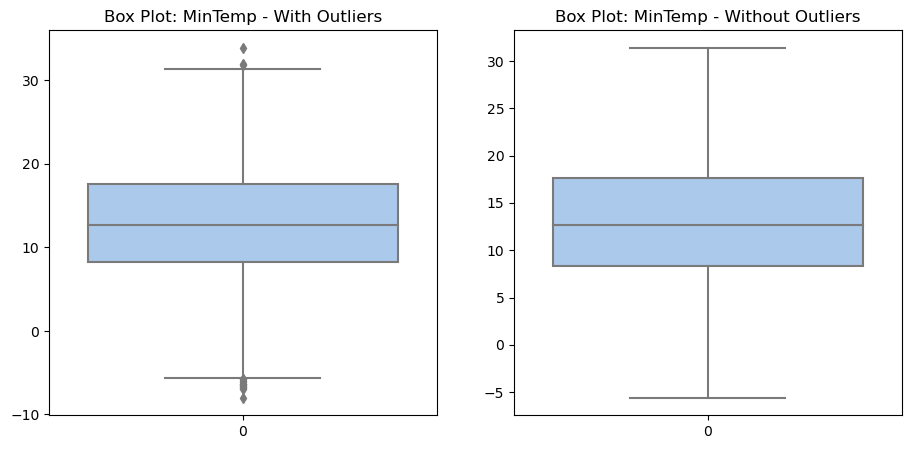

outliers: (73923,), no outliers: (73945,)


<Figure size 1000x400 with 0 Axes>

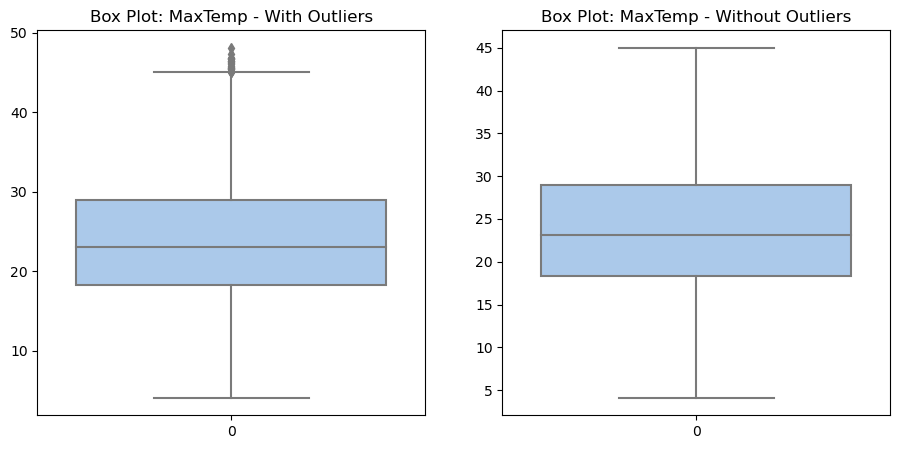

outliers: (73945,), no outliers: (60602,)


<Figure size 1000x400 with 0 Axes>

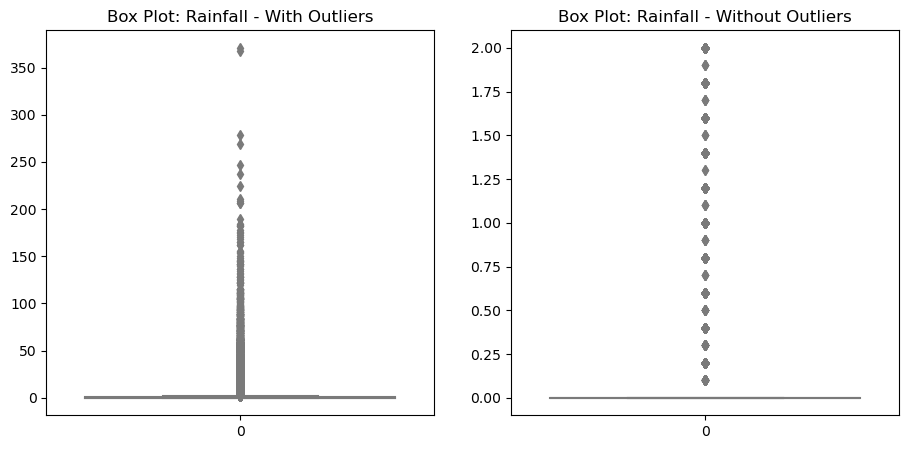

outliers: (57642,), no outliers: (59349,)


<Figure size 1000x400 with 0 Axes>

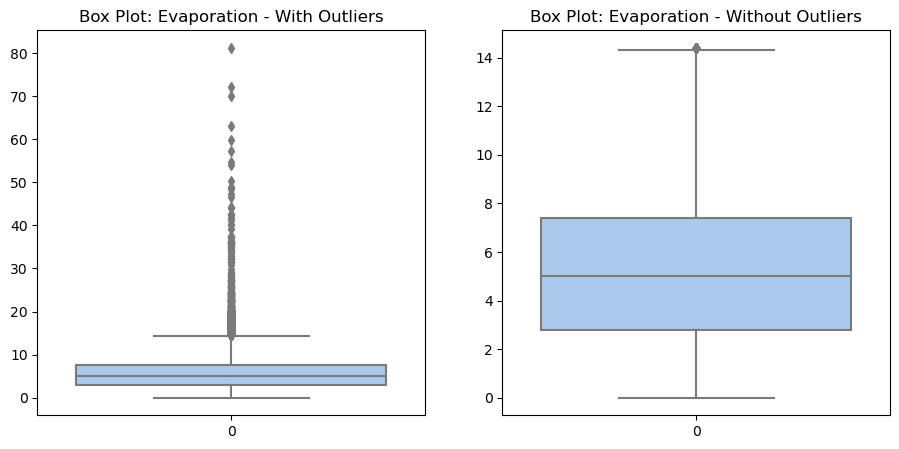

outliers: (59349,), no outliers: (59349,)


<Figure size 1000x400 with 0 Axes>

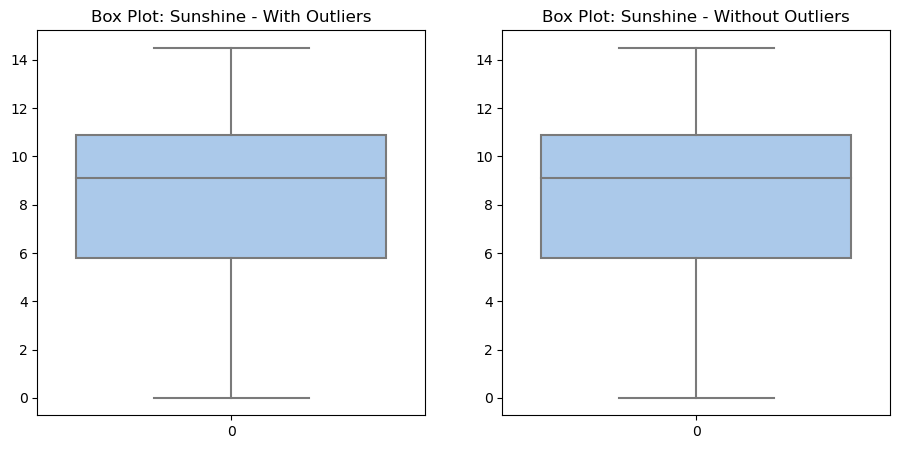

outliers: (56008,), no outliers: (57448,)


<Figure size 1000x400 with 0 Axes>

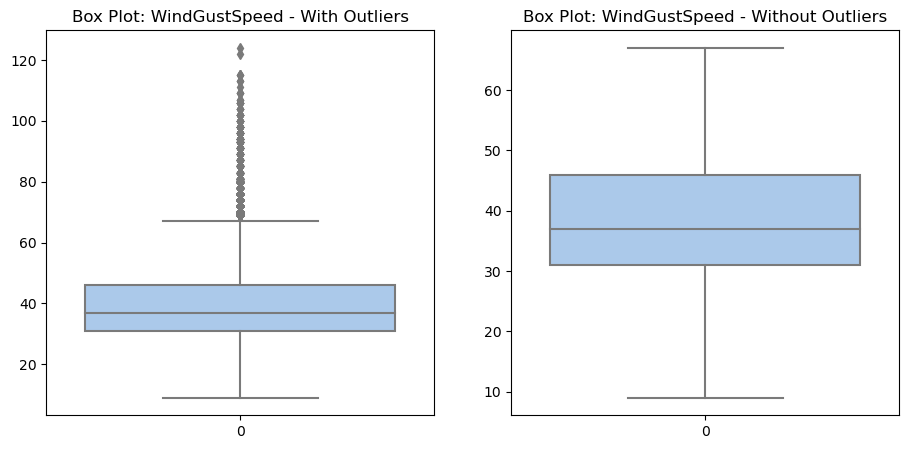

outliers: (57334,), no outliers: (56737,)


<Figure size 1000x400 with 0 Axes>

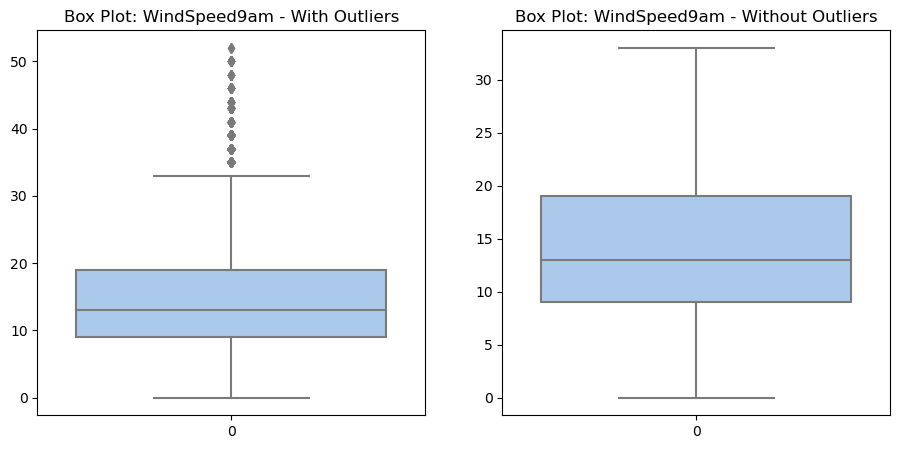

outliers: (56449,), no outliers: (56453,)


<Figure size 1000x400 with 0 Axes>

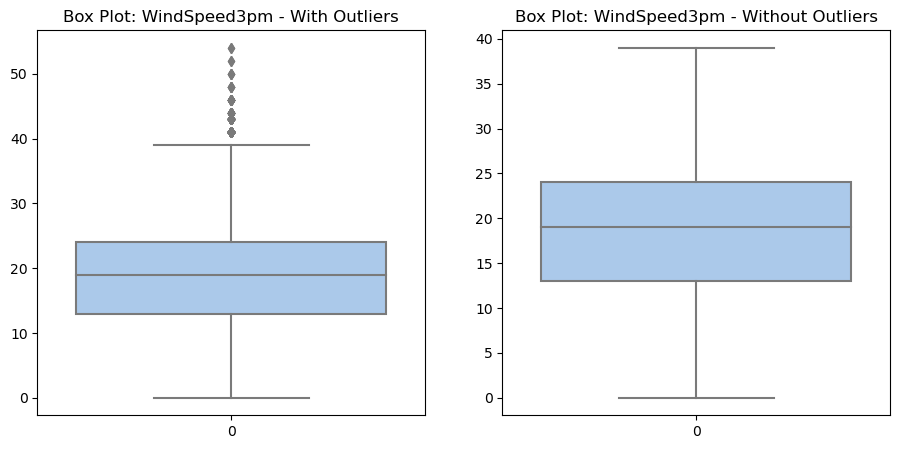

outliers: (56175,), no outliers: (55651,)


<Figure size 1000x400 with 0 Axes>

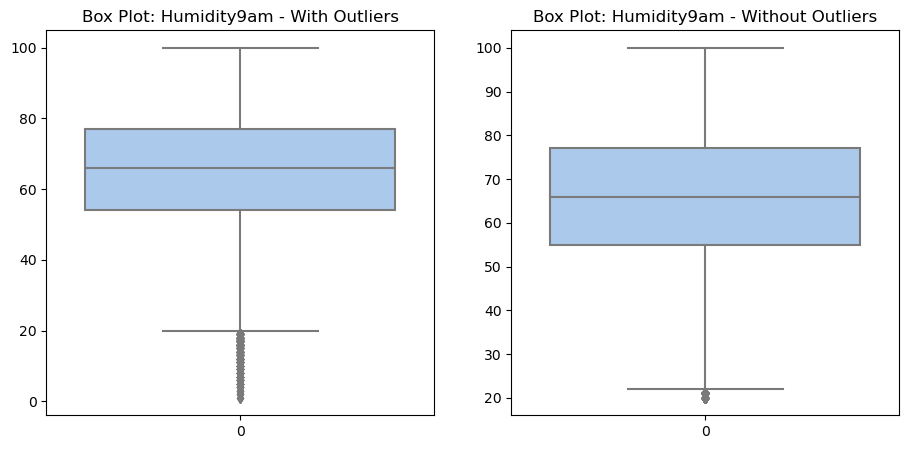

outliers: (55230,), no outliers: (55651,)


<Figure size 1000x400 with 0 Axes>

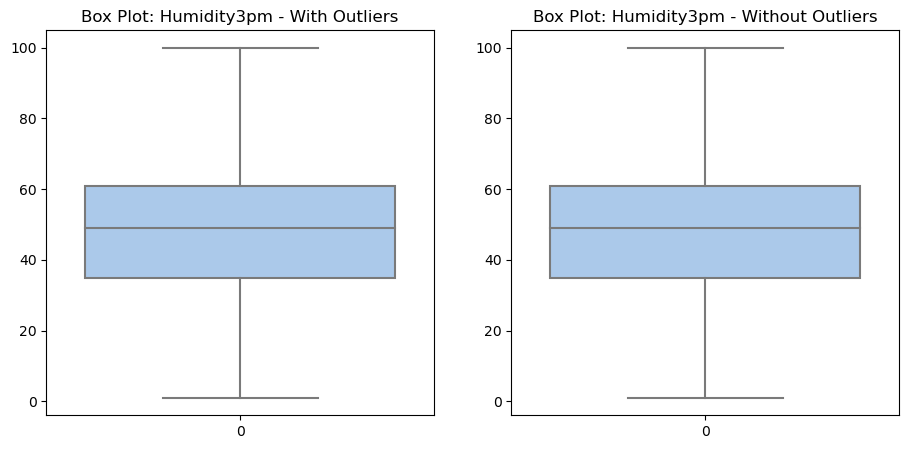

outliers: (55564,), no outliers: (55257,)


<Figure size 1000x400 with 0 Axes>

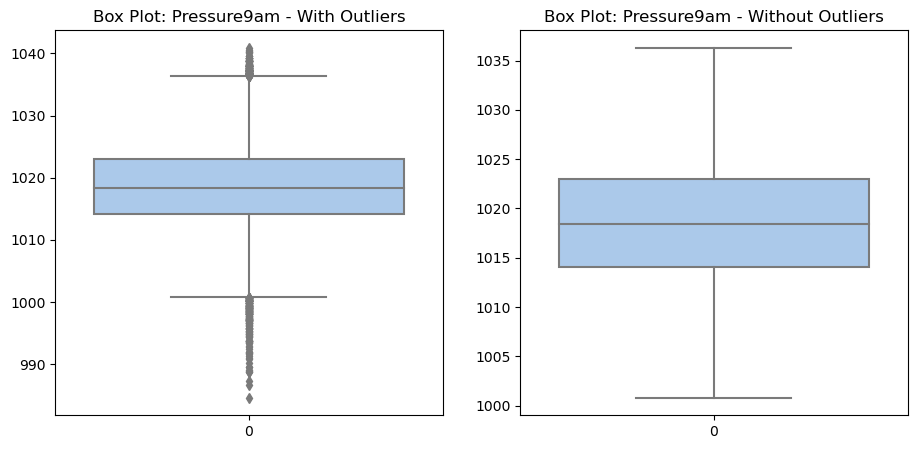

outliers: (55168,), no outliers: (55137,)


<Figure size 1000x400 with 0 Axes>

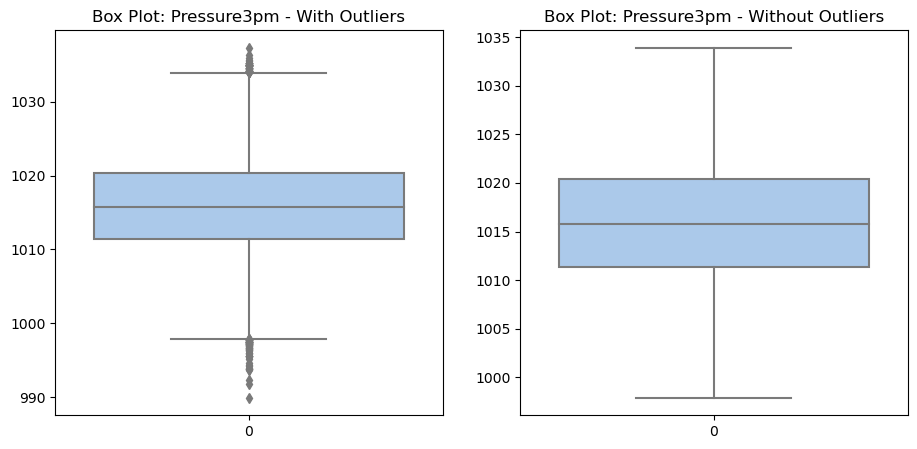

outliers: (49393,), no outliers: (55137,)


<Figure size 1000x400 with 0 Axes>

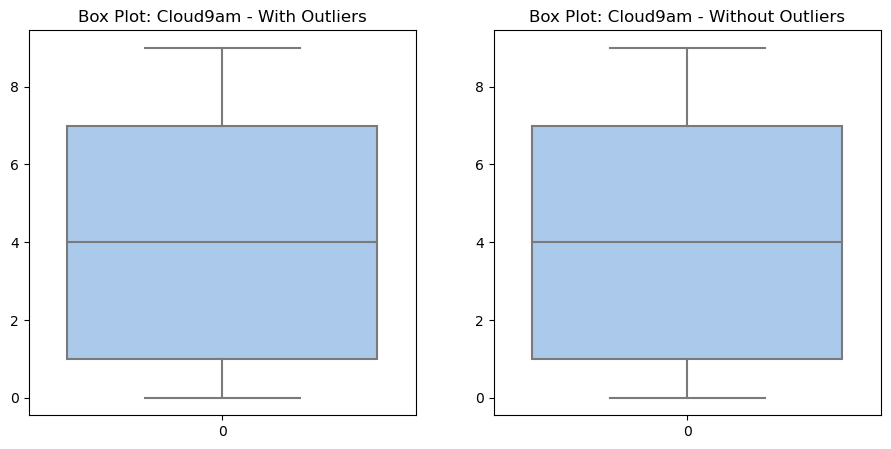

outliers: (48148,), no outliers: (55137,)


<Figure size 1000x400 with 0 Axes>

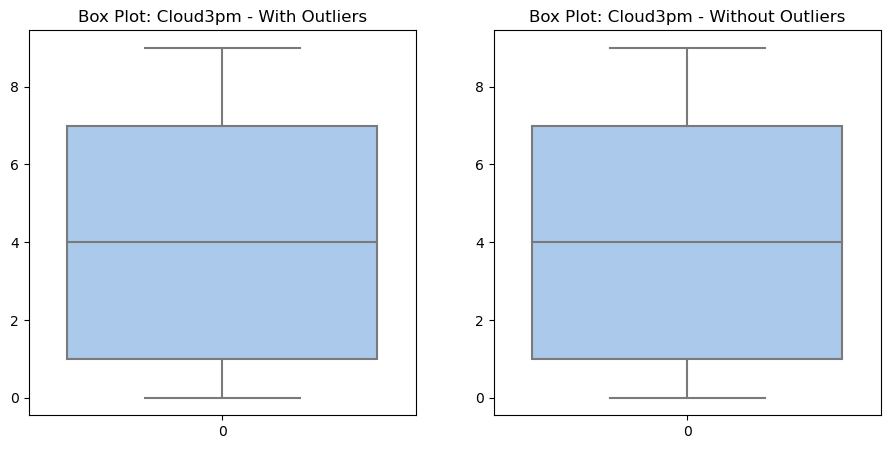

outliers: (55061,), no outliers: (55135,)


<Figure size 1000x400 with 0 Axes>

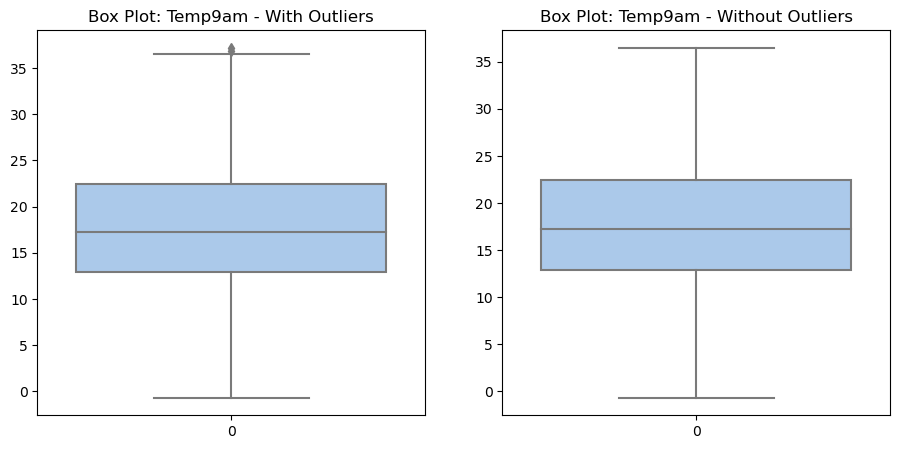

outliers: (54892,), no outliers: (55104,)


<Figure size 1000x400 with 0 Axes>

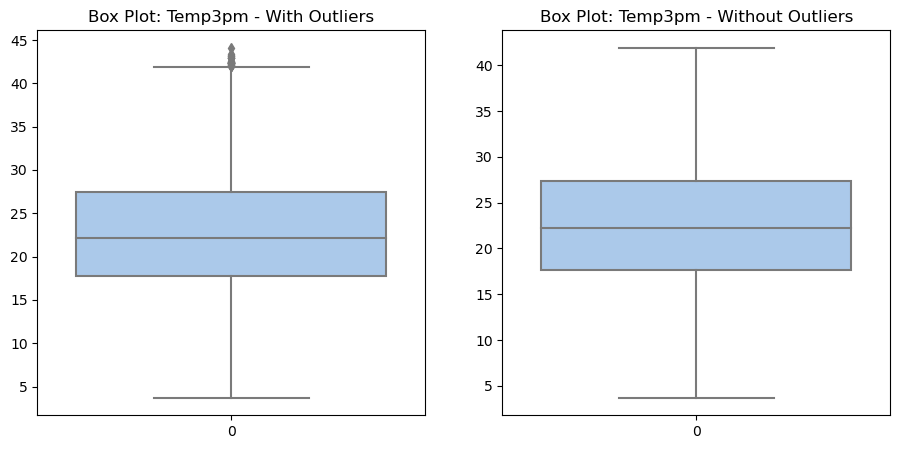

outliers: (55104,), no outliers: (55104,)


<Figure size 1000x400 with 0 Axes>

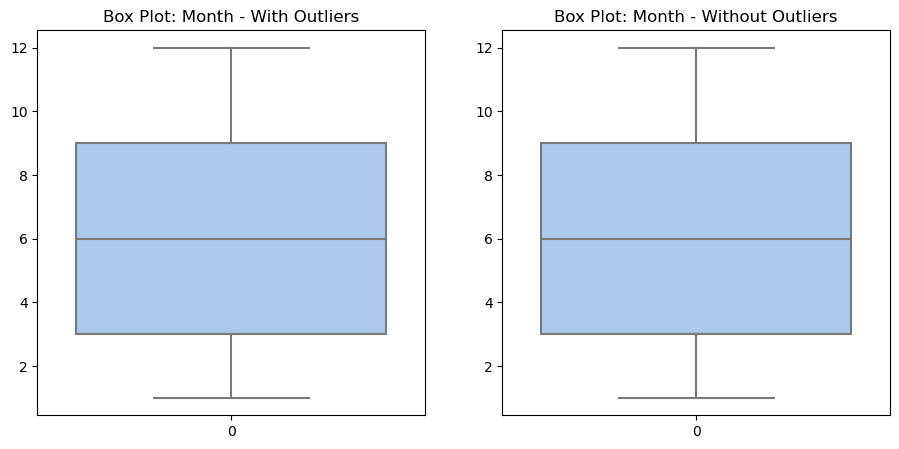

In [14]:
for col in df_labeled.columns:
    if col not in categorical + ['RainTomorrow']:
        dfcol = df_labeled[col]
        dfcol = dfcol[~np.isnan(dfcol)]
        df_no_outliers = drop_outliers(df_labeled, col)
        print(f'outliers: {dfcol.shape}, no outliers: {df_no_outliers.shape}')
        box_plot(dfcol, df_no_outliers)

### Handling Missing Values

In [15]:
def fill_mean(datacol):
    dataunique = datacol.unique()
    dataunique = dataunique[~np.isnan(dataunique)]
    data_mean = np.mean(dataunique)
    return datacol.fillna(data_mean)

In [16]:
for col in df_labeled.columns:
    if col not in ['RainTomorrow']:
        df_labeled[col] = fill_mean(df_labeled[col])

In [17]:
df_labeled.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Month            0
RainTomorrow     0
dtype: int64

In [18]:
#df_labeled['RainTomorrow'] = df_labeled['RainTomorrow'].map({'No':0, 'Yes':1})  
df_labeled['WindGustDir'] = df_labeled['WindGustDir'].astype(int)
df_labeled['WindDir9am'] = df_labeled['WindDir9am'].astype(int)
df_labeled['WindDir3pm'] = df_labeled['WindDir3pm'].astype(int)
df_labeled

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,RainTomorrow
6049,3,17.9,35.2,0.0,12.0,12.3,7,48.0,1,5,...,13.0,1006.30,1004.4,2.0,5.0,26.600000,33.4,0,1,No
6051,3,15.5,34.1,0.0,12.6,13.3,3,30.0,7,11,...,7.0,1018.55,1011.6,4.5,1.0,17.417549,32.7,0,1,No
6052,3,19.4,37.6,0.0,10.8,10.6,10,46.0,10,12,...,22.0,1012.30,1009.2,1.0,6.0,28.700000,34.9,0,1,No
6053,3,21.9,38.4,0.0,11.4,12.2,15,31.0,15,9,...,22.0,1012.70,1009.1,1.0,5.0,29.100000,35.6,0,1,No
6055,3,27.1,36.1,0.0,13.0,0.0,11,43.0,11,15,...,19.0,1007.70,1007.4,8.0,8.0,30.700000,34.3,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,21,19.3,33.4,0.0,6.0,11.0,1,35.0,3,4,...,32.0,1013.90,1010.5,0.0,1.0,24.500000,32.3,0,6,No
142299,21,21.2,32.6,0.0,7.6,8.6,0,37.0,3,3,...,28.0,1014.60,1011.2,7.0,0.0,24.800000,32.0,0,6,No
142300,21,20.7,32.8,0.0,5.6,11.0,0,33.0,0,13,...,23.0,1015.30,1011.8,0.0,0.0,24.800000,32.1,0,6,No
142301,21,19.5,31.8,0.0,6.2,10.6,2,26.0,3,12,...,58.0,1014.90,1010.7,1.0,1.0,24.800000,29.2,0,6,No


In [19]:
df_labeled0 = df_labeled.groupby('RainTomorrow', group_keys=False).apply(lambda x: x.sample(frac=0.18))
df_labeled0.shape

(9919, 23)

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X = df_labeled0.drop('RainTomorrow',axis=1)
y = df_labeled0['RainTomorrow']
X,y = smote.fit_resample(X,y)
X.shape, y.value_counts()

((16754, 22),
 No     8377
 Yes    8377
 Name: RainTomorrow, dtype: int64)

In [21]:
df_labeled0 = X.copy()
df_labeled0['RainTomorrow'] = y.copy()
df_labeled0

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,RainTomorrow
0,24,10.300000,30.700000,0.000000,4.000000,13.000000,7,33.000000,0,7,...,31.000000,1018.600000,1015.900000,1.000000,1.000000,18.400000,30.200000,0,12,No
1,1,3.400000,18.200000,0.000000,2.800000,10.300000,0,30.000000,15,3,...,40.000000,1021.100000,1018.200000,0.000000,1.000000,10.300000,17.700000,0,7,No
2,25,14.300000,18.200000,0.000000,4.000000,9.300000,0,37.000000,0,2,...,54.000000,1027.600000,1025.400000,2.000000,2.000000,16.300000,16.700000,0,6,No
3,5,10.000000,20.100000,0.000000,6.922464,9.100000,1,46.000000,1,1,...,48.000000,1029.000000,1026.400000,4.500000,4.500000,13.100000,19.400000,0,6,No
4,21,25.500000,34.500000,0.000000,5.800000,5.800000,15,39.000000,0,14,...,62.000000,1009.600000,1007.400000,7.000000,7.000000,28.600000,33.400000,0,11,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16749,11,16.179467,22.203040,0.311787,3.696071,5.373760,8,43.000000,13,11,...,67.803556,1011.398222,1009.521796,4.921422,5.441067,20.735360,20.858933,0,6,Yes
16750,19,8.799940,13.499920,0.000000,3.399860,0.099990,6,37.968653,12,12,...,83.000301,1027.199389,1024.099629,7.000000,8.000000,9.700080,13.099760,0,7,Yes
16751,7,19.140453,39.631853,0.000000,7.116481,11.500000,0,44.260396,3,11,...,24.199434,1013.980057,1010.165926,3.869802,3.869802,29.444045,38.357892,0,4,Yes
16752,11,14.120660,30.615446,1.096898,10.496898,5.097954,14,48.700990,5,12,...,56.866006,1011.644356,1009.325808,3.866006,7.783498,23.617557,23.481452,0,11,Yes


plt.figure(figsize=(30,30))
sns.pairplot(df_labeled0, hue="RainTomorrow")
plt.show()

# Estudio de Correlaciones: Solucion1

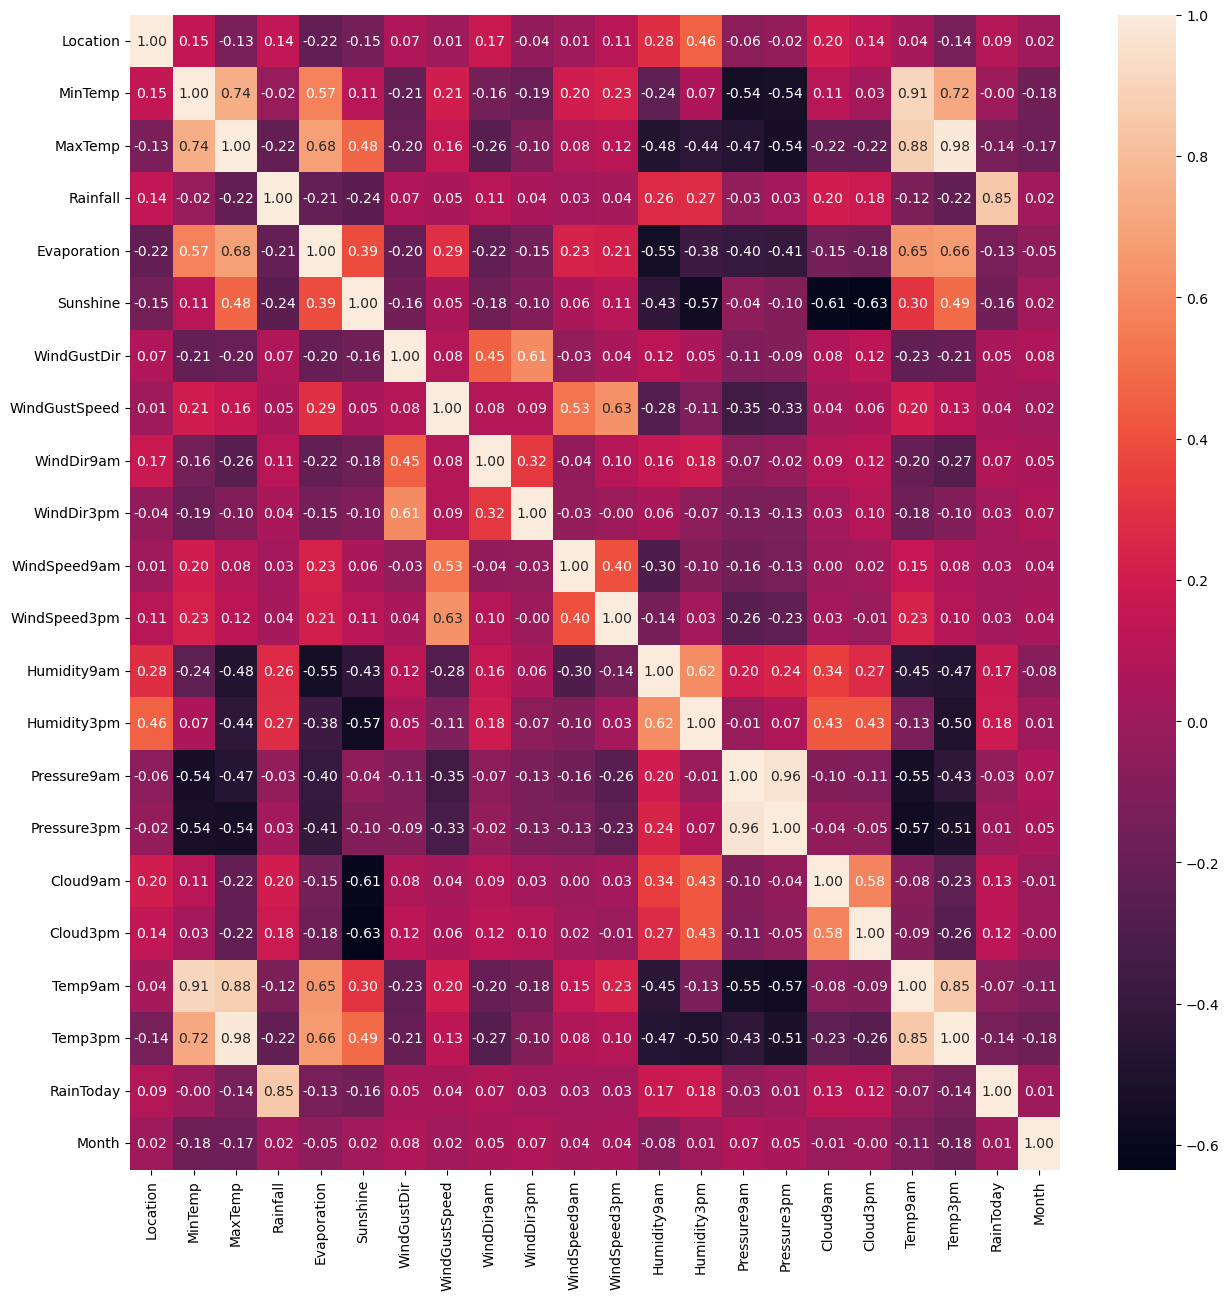

In [22]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df_labeled.corr(), annot=True, fmt='.2f') 
plt.show()

In [23]:
correlation_mat = df_labeled.corr().abs()
unstak = correlation_mat.unstack()
unstak_sorted = unstak.sort_values(kind="quicksort", ascending=False)
unstak_sorted[(unstak_sorted>0.6) & (unstak_sorted<1)]

Temp3pm        MaxTemp          0.983117
MaxTemp        Temp3pm          0.983117
Pressure9am    Pressure3pm      0.964199
Pressure3pm    Pressure9am      0.964199
MinTemp        Temp9am          0.907344
Temp9am        MinTemp          0.907344
               MaxTemp          0.875485
MaxTemp        Temp9am          0.875485
Temp9am        Temp3pm          0.852038
Temp3pm        Temp9am          0.852038
Rainfall       RainToday        0.850849
RainToday      Rainfall         0.850849
MaxTemp        MinTemp          0.738233
MinTemp        MaxTemp          0.738233
Temp3pm        MinTemp          0.716241
MinTemp        Temp3pm          0.716241
Evaporation    MaxTemp          0.683669
MaxTemp        Evaporation      0.683669
Temp3pm        Evaporation      0.661685
Evaporation    Temp3pm          0.661685
Temp9am        Evaporation      0.652335
Evaporation    Temp9am          0.652335
Cloud3pm       Sunshine         0.634803
Sunshine       Cloud3pm         0.634803
WindGustSpeed  W

- MaxTemp  y Temp3pm estan correlacionadas al 98%, Por lo que elimino MaxTemp ya que su correlacion con la variable a predecir es de -0.11 frente a -0.14 de Temp3pm

- MinTemp y Temp9am estan correlacionadas al 90%, siendo la correlacion con la variable a predecir mayor en MinTemp, pero como esta correlacion es cercana a 0 y ademas esta correlacionada con MaxTemp en un 74%, elimino ambas

- Pressure9am y Presure3pm estan correlacionadas en un 98%, por lo que elimino Presure3pm, ya que su correlacion con la variable a predecir es ligeramente inferior

- RainToday y Rainfall estan correlacionadas al 85%, siendo la correlacion con la variable a predecir superior en Rainfall, por lo que elimino RainToday


In [24]:
high_corr = ['MaxTemp', 'MinTemp','Temp9am','Pressure3pm','RainToday' ]
low_corr = list(df_labeled.columns)
[low_corr.remove(x) for x in high_corr]
df_low_corrs = df_labeled[low_corr]
df_low_corrs0 = df_labeled0[low_corr]

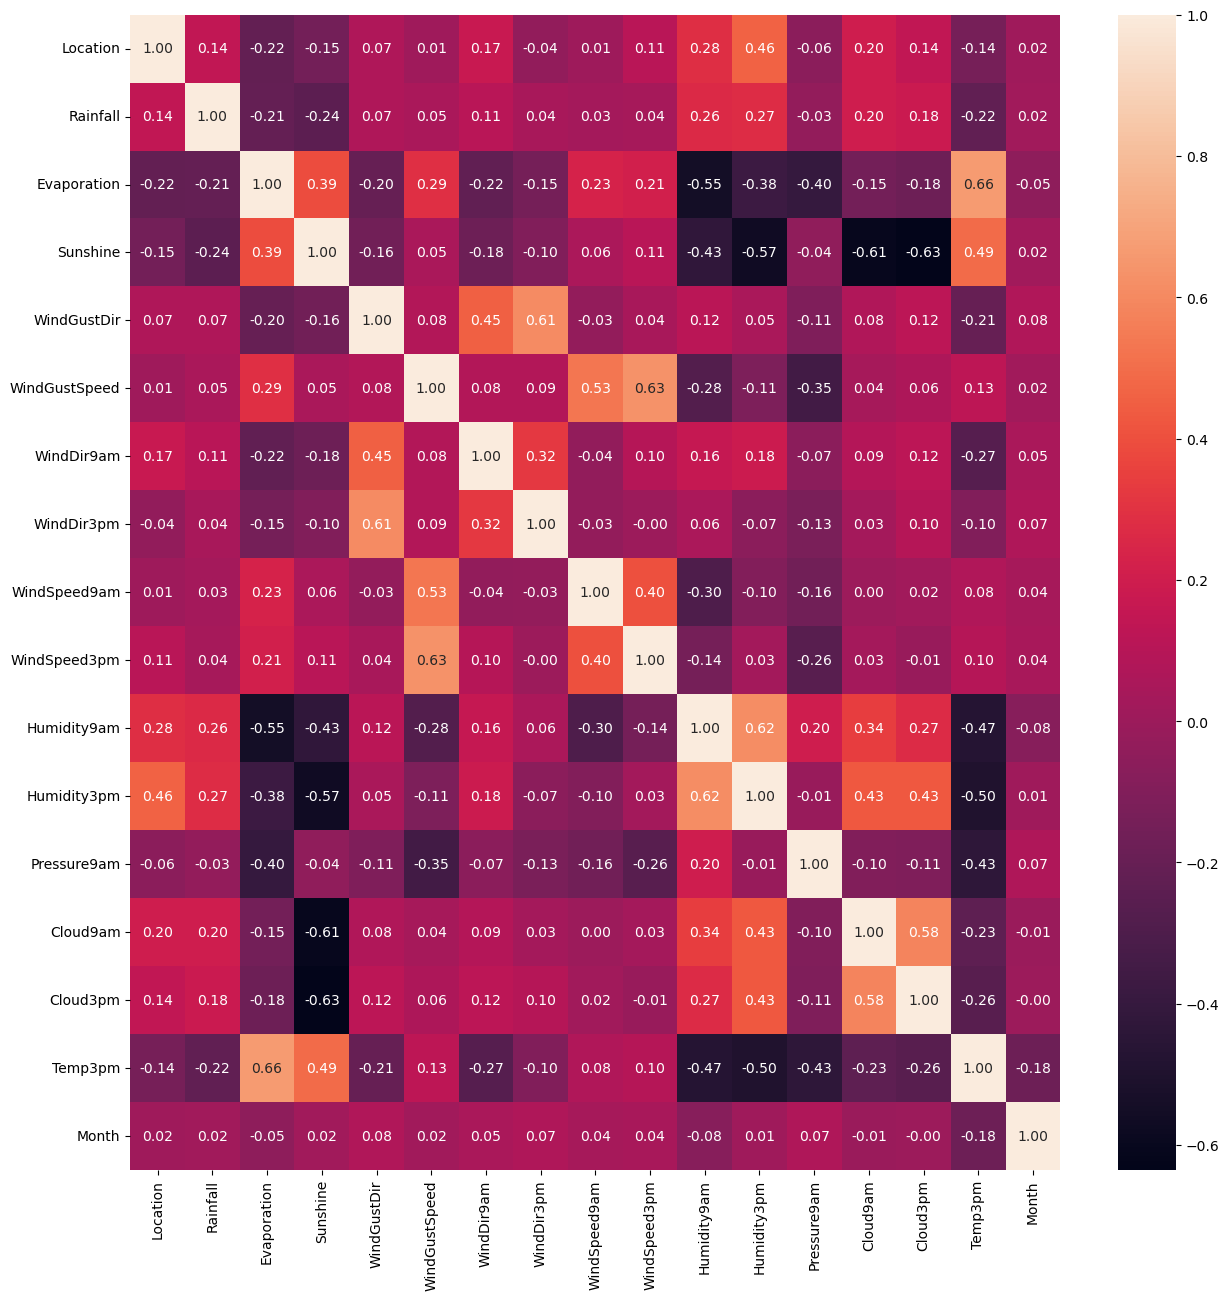

In [25]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df_low_corrs.corr(), annot=True, fmt='.2f') 
plt.show()

In [134]:
correlation_mat = df_low_corrs.corr().abs()
unstak = correlation_mat.unstack()
unstak_sorted = unstak.sort_values(kind="quicksort", ascending=False)
unstak_sorted[(unstak_sorted>0.6) & (unstak_sorted<1)]

Evaporation    Temp3pm          0.661685
Temp3pm        Evaporation      0.661685
Cloud3pm       Sunshine         0.634803
Sunshine       Cloud3pm         0.634803
WindSpeed3pm   WindGustSpeed    0.630115
WindGustSpeed  WindSpeed3pm     0.630115
Humidity9am    Humidity3pm      0.615846
Humidity3pm    Humidity9am      0.615846
WindDir3pm     WindGustDir      0.606681
WindGustDir    WindDir3pm       0.606681
Cloud9am       Sunshine         0.606183
Sunshine       Cloud9am         0.606183
dtype: float64

In [135]:
df_labeled.to_csv('Dataset/weatherAUS_prepared.csv', index = False)
df_labeled0.to_csv('Dataset/weatherAUS_prepared30.csv',index = False)
df_low_corrs.to_csv('Dataset/weatherAUS_prepared_lowCorr.csv',index = False)
df_low_corrs0.to_csv('Dataset/weatherAUS_prepared_lowCorr30.csv',index = False)


In [31]:
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from scipy.stats import normaltest


for col in df_low_corrs0.columns:
    data = df_low_corrs0[col]
    stat, p = normaltest(data)
    print('Estadisticos=%.3f, p=%.3f' % (stat, p))
    # Interpretación
    alpha = 0.05
    if p > alpha:
        print(f'La muestra {col} parece Gaussiana o Normal (no se rechaza la hipótesis nula H0)')
    else:
        print(f'La muestra {col} no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)')

Estadisticos=3403.733, p=0.000
La muestra Location no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
Estadisticos=5095.545, p=0.000
La muestra Rainfall no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
Estadisticos=327.065, p=0.000
La muestra Evaporation no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
Estadisticos=672.879, p=0.000
La muestra Sunshine no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
Estadisticos=3141.554, p=0.000
La muestra WindGustDir no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
Estadisticos=148.880, p=0.000
La muestra WindGustSpeed no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
Estadisticos=7501.148, p=0.000
La muestra WindDir9am no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
Estadisticos=4384.683, p=0.000
La muestra WindDir3pm no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
Estadisticos=217.527, p=0.000
La muestra WindSpeed9am no parece Gaussiana o Normal(s

In [108]:
from scipy.stats import normaltest, boxcox
data = np.array(df_low_corrs0['Location'])
data[data<=0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Location


C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col] = df_low_corrs0[col][df_low_corrs0[col]>0]
C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col],_= stats.boxcox(df_low_corrs0[col])


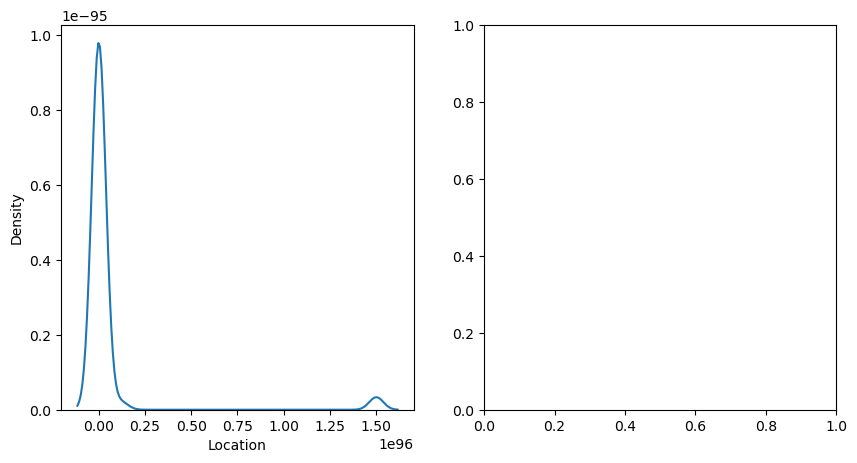

Estadisticos=6594.231, p=0.000
La muestra Location no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
MinTemp


C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col] = df_low_corrs0[col][df_low_corrs0[col]>0]
C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col],_= stats.boxcox(df_low_corrs0[col])


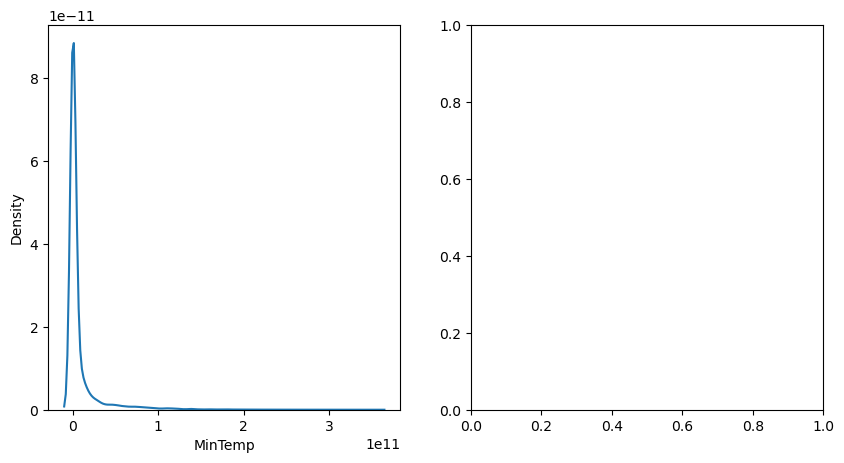

Estadisticos=6594.231, p=0.000
La muestra MinTemp no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
Rainfall


C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col] = df_low_corrs0[col][df_low_corrs0[col]>0]
C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col],_= stats.boxcox(df_low_corrs0[col])


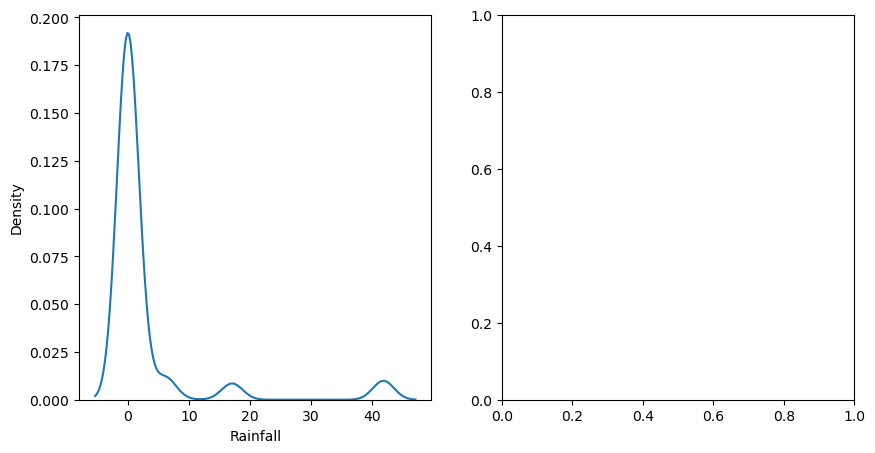

Estadisticos=6594.231, p=0.000
La muestra Rainfall no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
Evaporation


C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col] = df_low_corrs0[col][df_low_corrs0[col]>0]
C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col],_= stats.boxcox(df_low_corrs0[col])


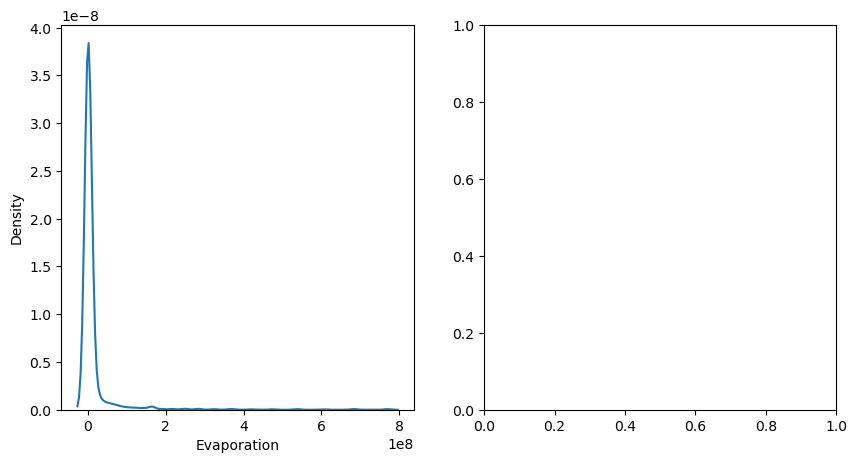

Estadisticos=6594.231, p=0.000
La muestra Evaporation no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
Sunshine


C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col] = df_low_corrs0[col][df_low_corrs0[col]>0]
C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col],_= stats.boxcox(df_low_corrs0[col])


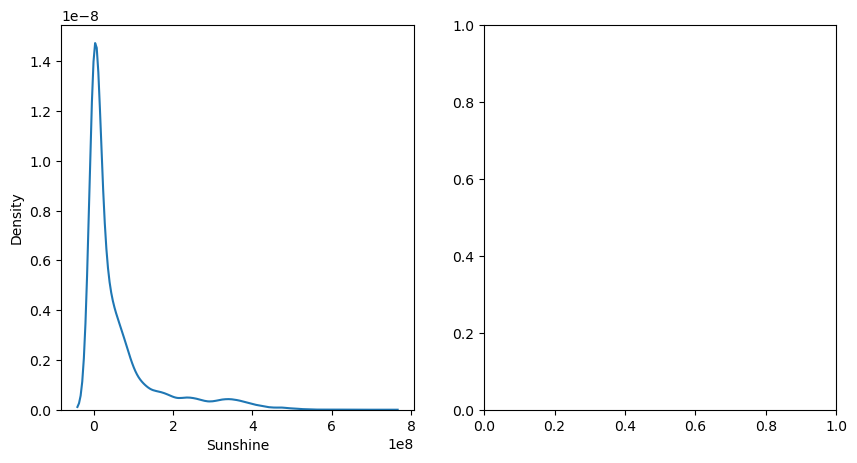

Estadisticos=6594.231, p=0.000
La muestra Sunshine no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
WindGustDir


C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col] = df_low_corrs0[col][df_low_corrs0[col]>0]
C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col],_= stats.boxcox(df_low_corrs0[col])


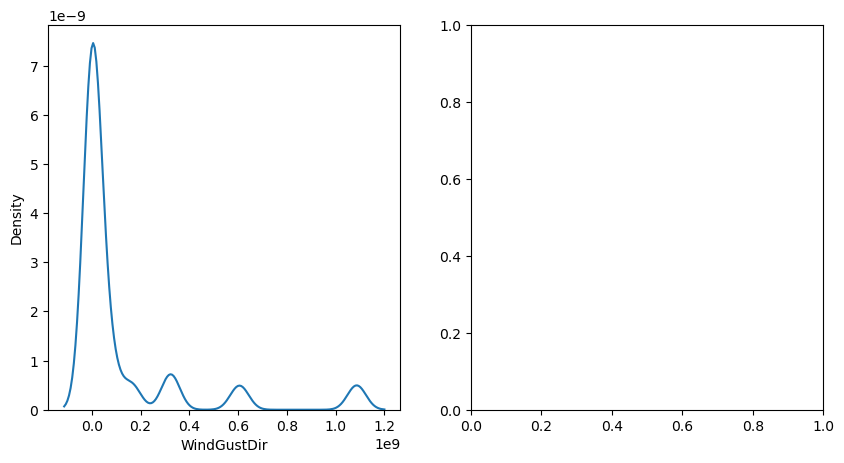

Estadisticos=6594.231, p=0.000
La muestra WindGustDir no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
WindGustSpeed


C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col] = df_low_corrs0[col][df_low_corrs0[col]>0]
C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col],_= stats.boxcox(df_low_corrs0[col])


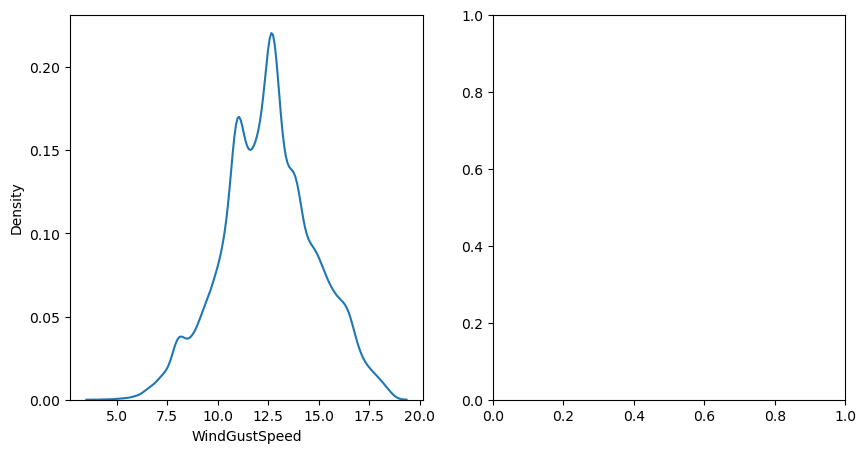

Estadisticos=6594.231, p=0.000
La muestra WindGustSpeed no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
WindDir9am


C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col] = df_low_corrs0[col][df_low_corrs0[col]>0]
C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col],_= stats.boxcox(df_low_corrs0[col])


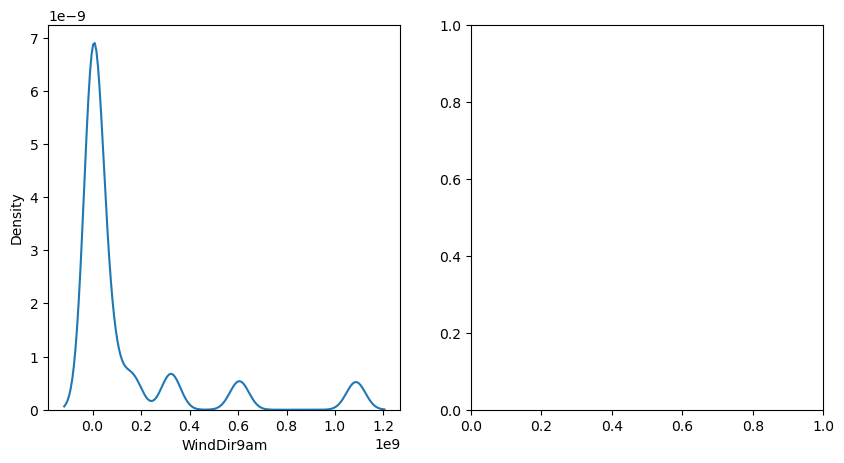

Estadisticos=6594.231, p=0.000
La muestra WindDir9am no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
WindDir3pm


C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col] = df_low_corrs0[col][df_low_corrs0[col]>0]
C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col],_= stats.boxcox(df_low_corrs0[col])


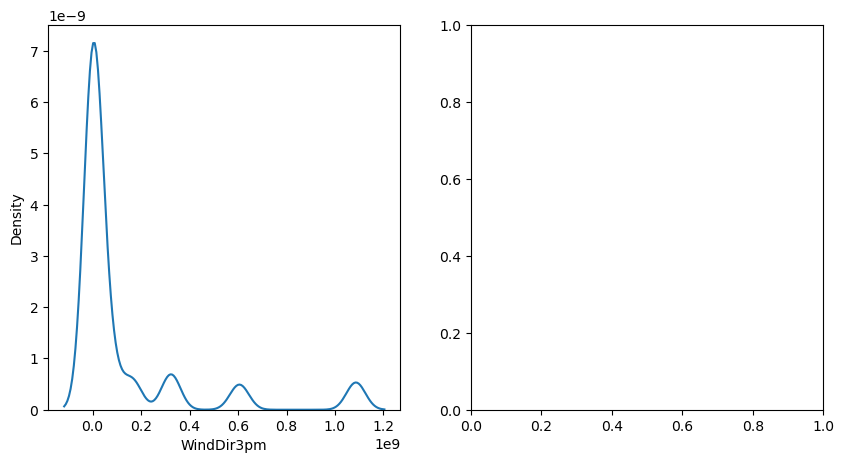

Estadisticos=6594.231, p=0.000
La muestra WindDir3pm no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
WindSpeed9am


C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col] = df_low_corrs0[col][df_low_corrs0[col]>0]
C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col],_= stats.boxcox(df_low_corrs0[col])


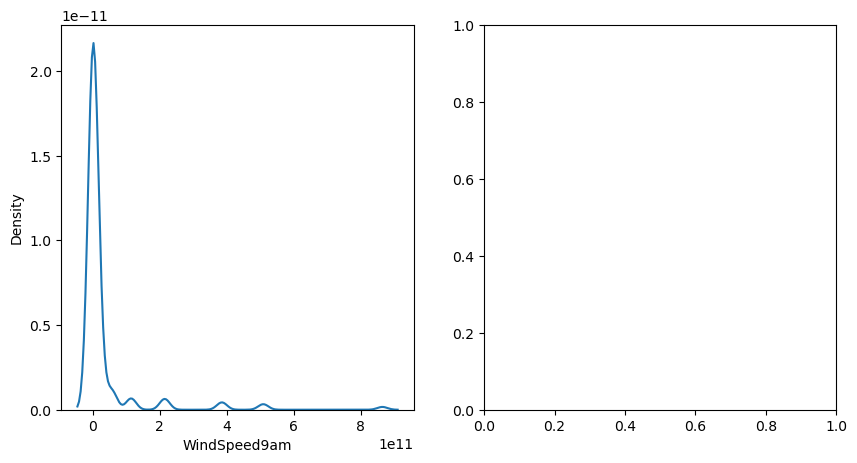

Estadisticos=6594.231, p=0.000
La muestra WindSpeed9am no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
WindSpeed3pm


C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col] = df_low_corrs0[col][df_low_corrs0[col]>0]
C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col],_= stats.boxcox(df_low_corrs0[col])


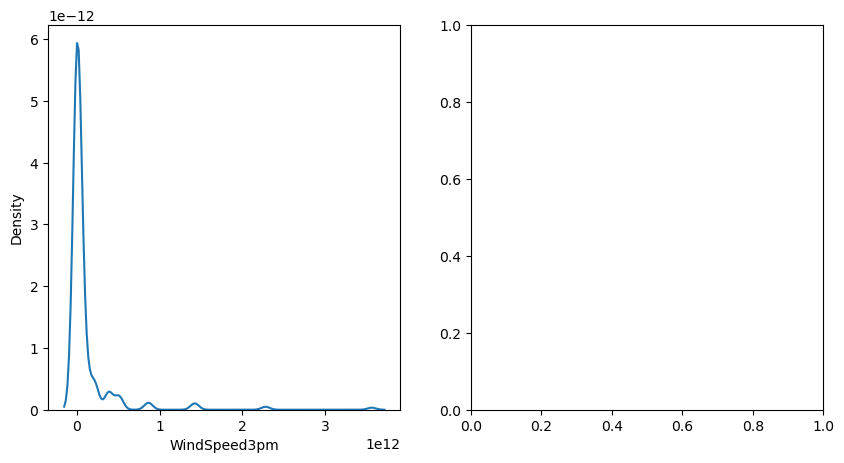

Estadisticos=6594.231, p=0.000
La muestra WindSpeed3pm no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
Humidity9am


C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col] = df_low_corrs0[col][df_low_corrs0[col]>0]
C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col],_= stats.boxcox(df_low_corrs0[col])


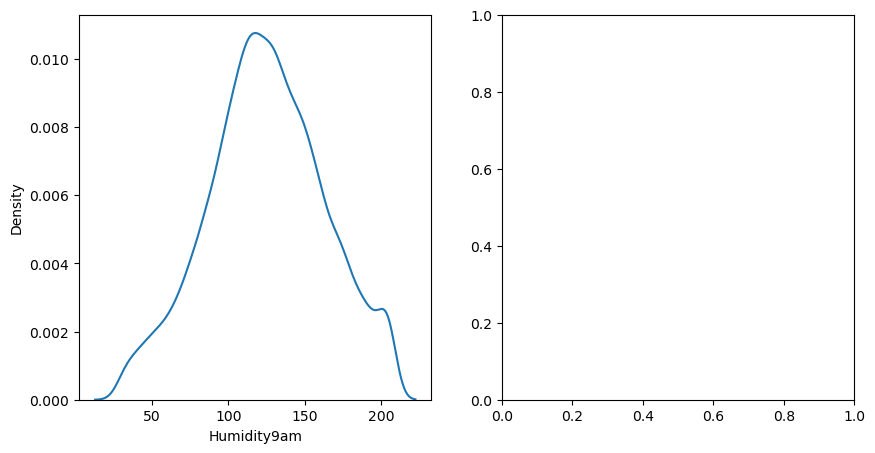

Estadisticos=6594.231, p=0.000
La muestra Humidity9am no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
Humidity3pm


C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col] = df_low_corrs0[col][df_low_corrs0[col]>0]
C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col],_= stats.boxcox(df_low_corrs0[col])


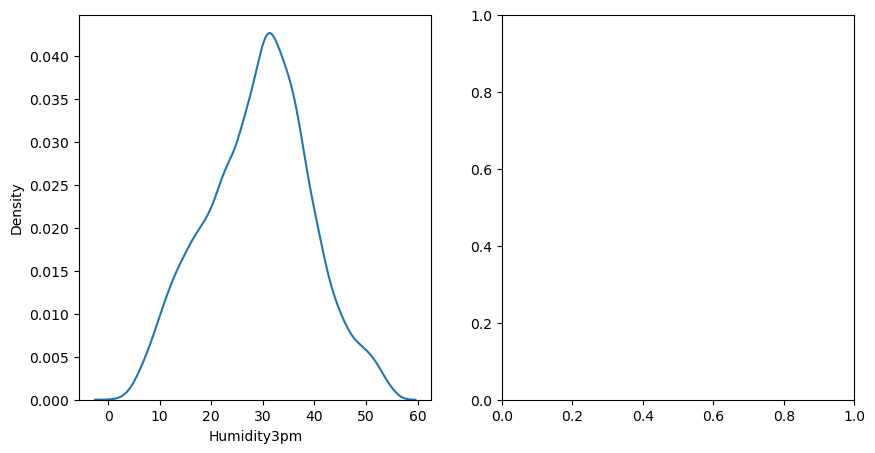

Estadisticos=6594.231, p=0.000
La muestra Humidity3pm no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
Pressure9am


C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col] = df_low_corrs0[col][df_low_corrs0[col]>0]
C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col],_= stats.boxcox(df_low_corrs0[col])


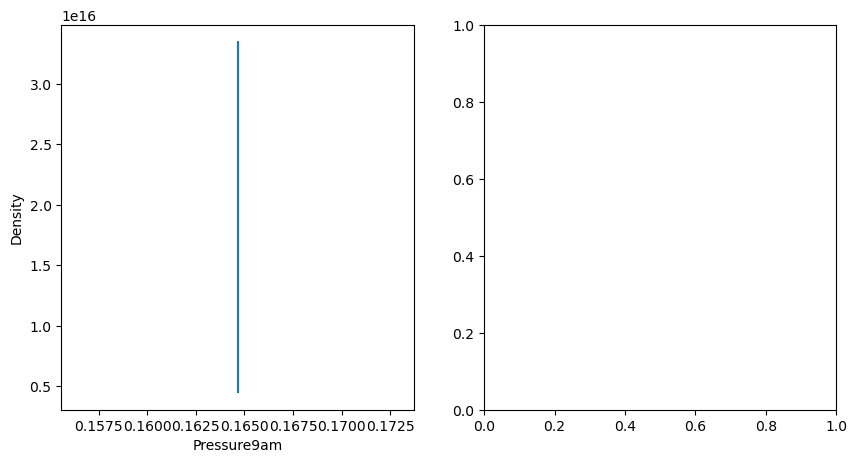

Estadisticos=6594.231, p=0.000
La muestra Pressure9am no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
Cloud9am


C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col] = df_low_corrs0[col][df_low_corrs0[col]>0]
C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col],_= stats.boxcox(df_low_corrs0[col])


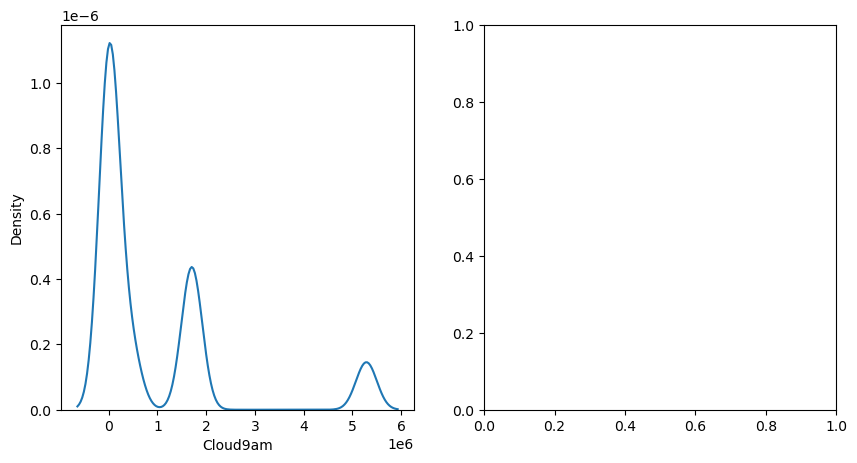

Estadisticos=6594.231, p=0.000
La muestra Cloud9am no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
Cloud3pm


C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col] = df_low_corrs0[col][df_low_corrs0[col]>0]
C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col],_= stats.boxcox(df_low_corrs0[col])


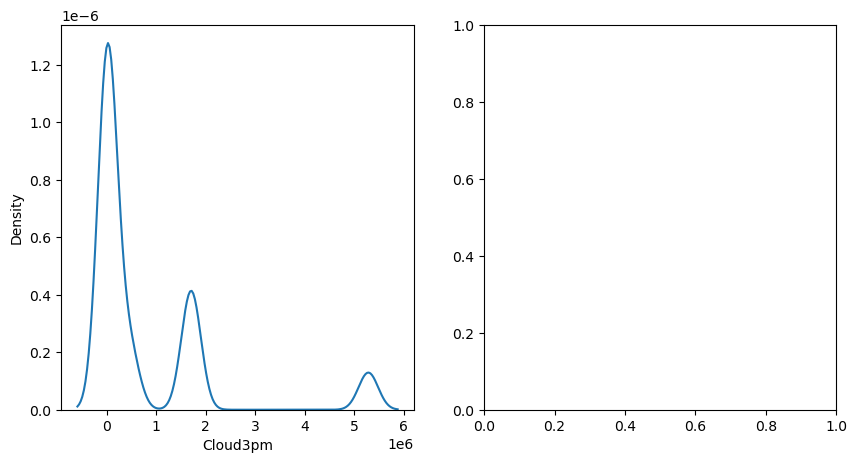

Estadisticos=6594.231, p=0.000
La muestra Cloud3pm no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
Temp3pm


C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col] = df_low_corrs0[col][df_low_corrs0[col]>0]
C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col],_= stats.boxcox(df_low_corrs0[col])


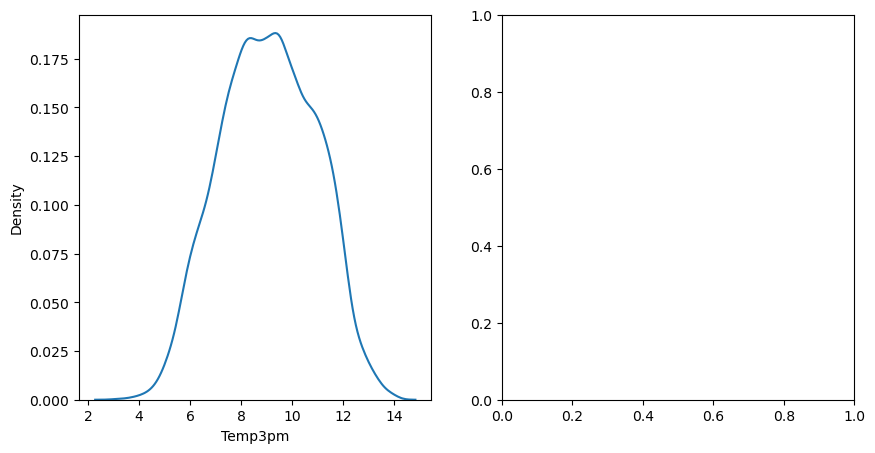

Estadisticos=6594.231, p=0.000
La muestra Temp3pm no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
Month


C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col] = df_low_corrs0[col][df_low_corrs0[col]>0]
C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col],_= stats.boxcox(df_low_corrs0[col])


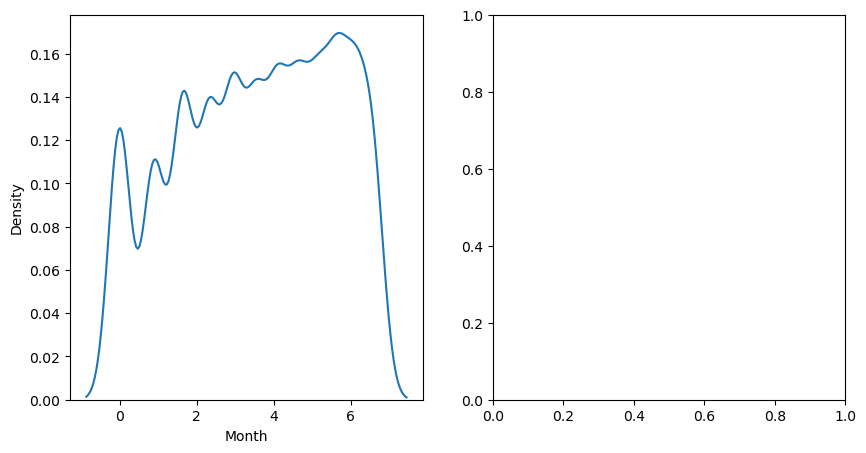

Estadisticos=6594.231, p=0.000
La muestra Month no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)
RainTomorrow


C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col] = df_low_corrs0[col][df_low_corrs0[col]>0]
C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0[col],_= stats.boxcox(df_low_corrs0[col])
C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\2528797824.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disabl

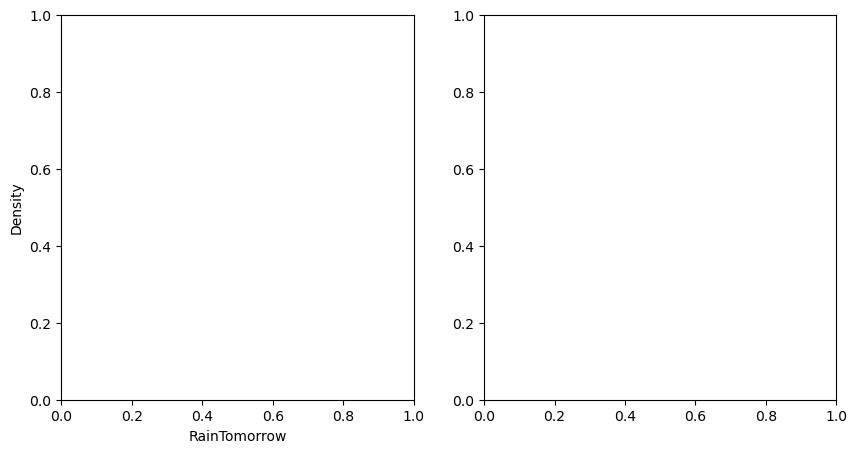

Estadisticos=6594.231, p=0.000
La muestra RainTomorrow no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)


In [121]:
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from scipy import stats

def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature])
    plt.show()
    
    
for col in df_low_corrs0.columns:
    print(col)
    df_low_corrs0[col] = df_low_corrs0[col][df_low_corrs0[col]>0]
    df_low_corrs0[col],_= stats.boxcox(df_low_corrs0[col])
    normality(df_low_corrs0, col)

    stat, p = normaltest(data)
    print('Estadisticos=%.3f, p=%.3f' % (stat, p))
    # Interpretación
    alpha = 0.05
    if p > alpha:
        print(f'La muestra {col} parece Gaussiana o Normal (no se rechaza la hipótesis nula H0)')
    else:
        print(f'La muestra {col} no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)')

# Estudio de Correlaciones: Solucion2

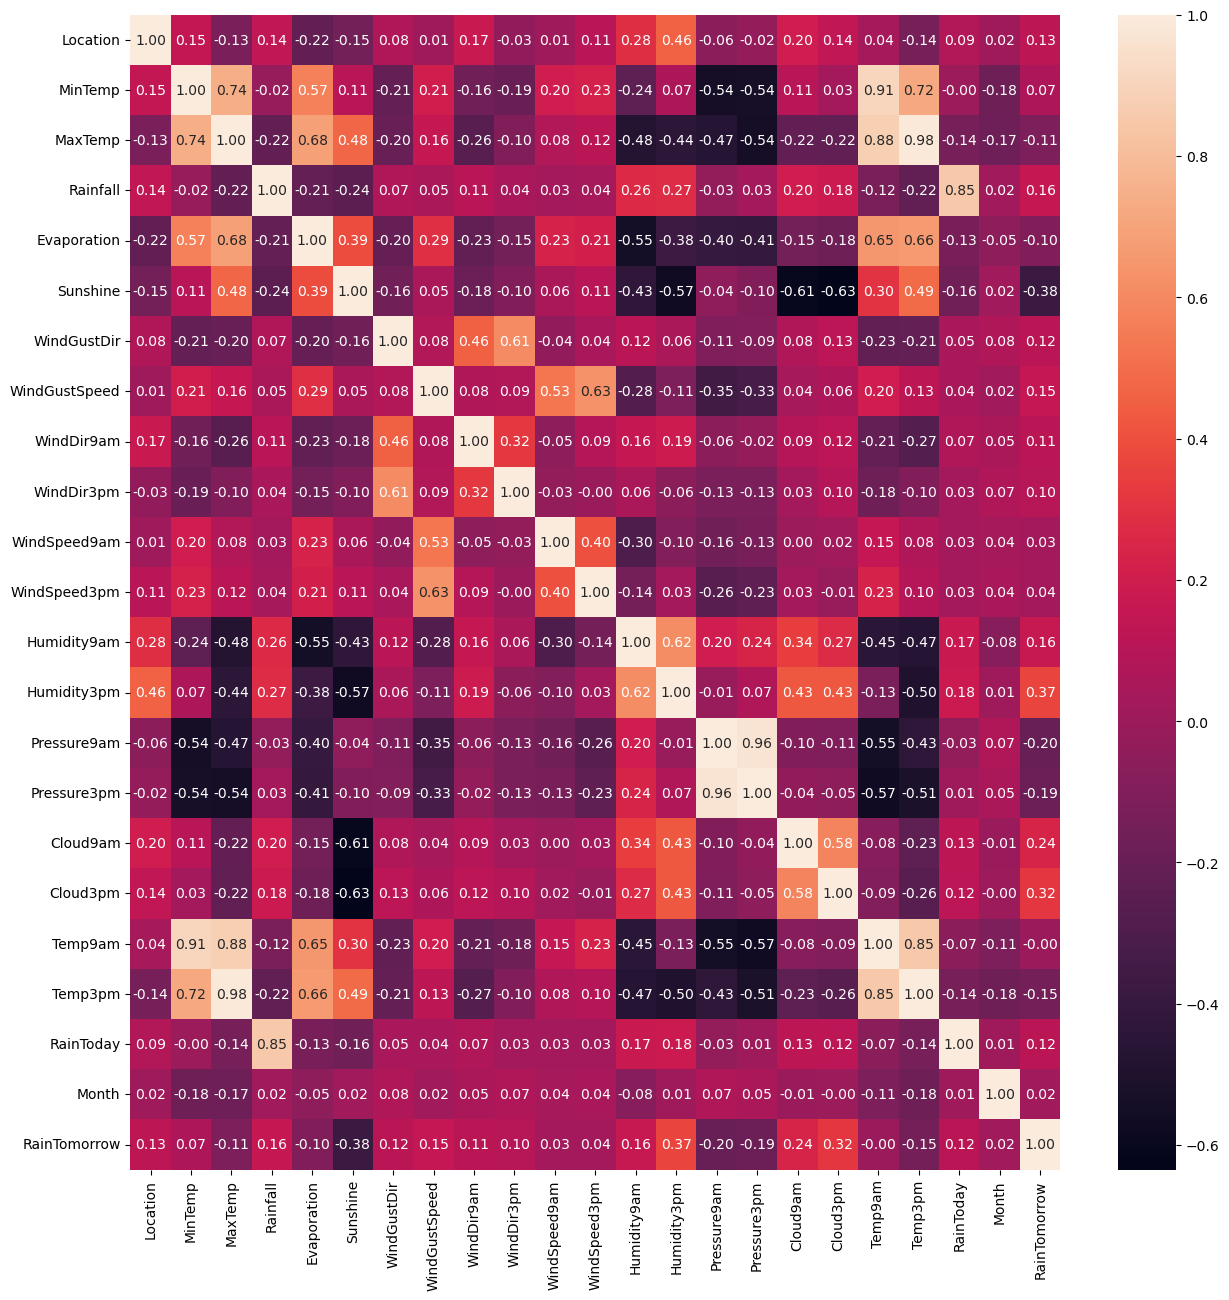

In [20]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df_labeled.corr(), annot=True, fmt='.2f') 
plt.show()

In [41]:
correlation_mat = df_labeled.corr().abs()
unstak = correlation_mat.unstack()
unstak_sorted = unstak.sort_values(kind="quicksort", ascending=False)
unstak_sorted[(unstak_sorted>0.6) & (unstak_sorted<1)]

Temp3pm        MaxTemp          0.983117
MaxTemp        Temp3pm          0.983117
Pressure9am    Pressure3pm      0.964199
Pressure3pm    Pressure9am      0.964199
Temp9am        MinTemp          0.907344
MinTemp        Temp9am          0.907344
MaxTemp        Temp9am          0.875485
Temp9am        MaxTemp          0.875485
Temp3pm        Temp9am          0.852038
Temp9am        Temp3pm          0.852038
RainToday      Rainfall         0.850849
Rainfall       RainToday        0.850849
MinTemp        MaxTemp          0.738233
MaxTemp        MinTemp          0.738233
Temp3pm        MinTemp          0.716241
MinTemp        Temp3pm          0.716241
Evaporation    MaxTemp          0.683669
MaxTemp        Evaporation      0.683669
Evaporation    Temp3pm          0.661685
Temp3pm        Evaporation      0.661685
Temp9am        Evaporation      0.652335
Evaporation    Temp9am          0.652335
Sunshine       Cloud3pm         0.634803
Cloud3pm       Sunshine         0.634803
WindSpeed3pm   W

- MaxTemp  y Temp3pm estan correlacionadas al 98%, Por lo que elimino MaxTemp ya que su correlacion con la variable a predecir es de -0.11 frente a -0.14 de Temp3pm

- MinTemp y Temp9am estan correlacionadas al 90%, siendo la correlacion con la variable a predecir mayor en MinTemp, por lo que elimino Temp9am

- Pressure9am y Presure3pm estan correlacionadas en un 98%, por lo que elimino Presure3pm, ya que su correlacion con la variable a predecir es ligeramente inferior

- RainToday y Rainfall estan correlacionadas al 85%, siendo la correlacion con la variable a predecir superior en Rainfall, por lo que elimino RainToday


In [42]:
high_corr = ['MaxTemp', 'MinTemp','Temp9am','Pressure3pm','RainToday' ]
low_corr = list(df_labeled.columns)
[low_corr.remove(x) for x in high_corr]
df_low_corrs = df_labeled[low_corr]
df_low_corrs0 = df_labeled0[low_corr]

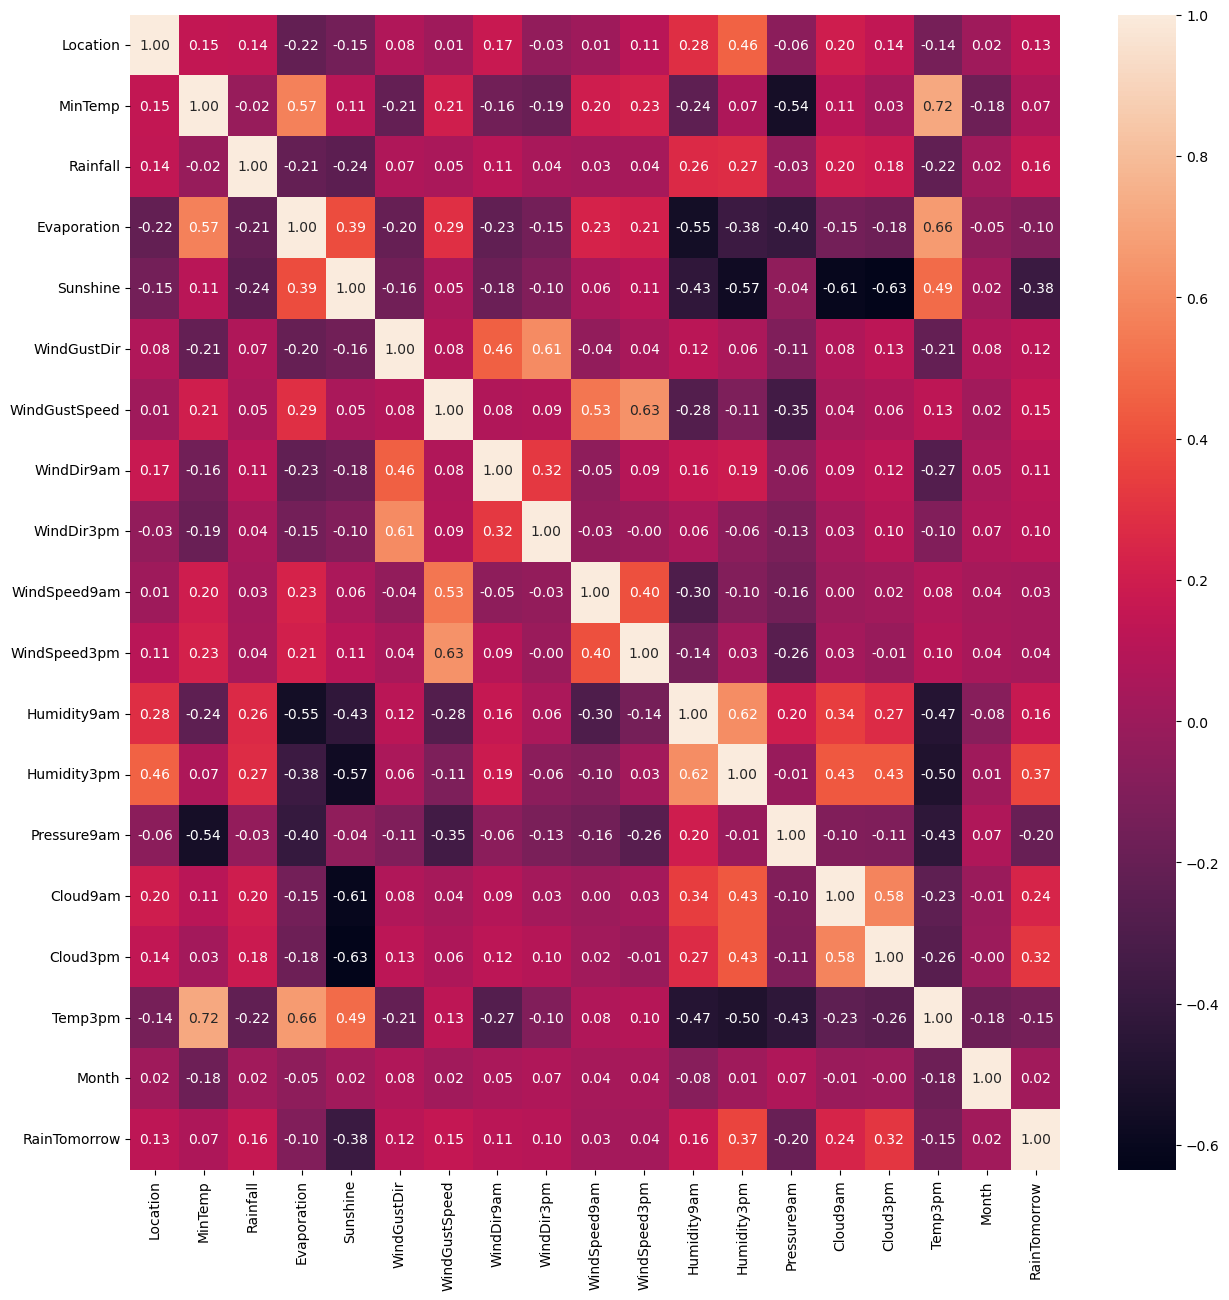

In [43]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df_low_corrs.corr(), annot=True, fmt='.2f') 
plt.show()

In [44]:
correlation_mat = df_low_corrs.corr().abs()
unstak = correlation_mat.unstack()
unstak_sorted = unstak.sort_values(kind="quicksort", ascending=False)
unstak_sorted[(unstak_sorted>0.6) & (unstak_sorted<1)]

MinTemp        Temp3pm          0.716241
Temp3pm        MinTemp          0.716241
               Evaporation      0.661685
Evaporation    Temp3pm          0.661685
Cloud3pm       Sunshine         0.634803
Sunshine       Cloud3pm         0.634803
WindGustSpeed  WindSpeed3pm     0.630115
WindSpeed3pm   WindGustSpeed    0.630115
Humidity9am    Humidity3pm      0.615846
Humidity3pm    Humidity9am      0.615846
Cloud9am       Sunshine         0.606183
Sunshine       Cloud9am         0.606183
WindDir3pm     WindGustDir      0.605218
WindGustDir    WindDir3pm       0.605218
dtype: float64

- MinTemp y Temp3pm tienen una correlacion muy alta, esto puede deverse a que en los dias de lluvia la diferencia de temperaturas sea baja, lo que nos puede dar un indicativo. A continuación podemos apreciar este comportamiento

In [55]:
tempDiff= df_low_corrs0['Temp3pm'] - df_low_corrs0['MinTemp']
tempDiff = pd.DataFrame(tempDiff, columns=['TempDiff'])
df_low_corrs0['TempDiff'] = tempDiff.TempDiff

C:\Users\rafas\AppData\Local\Temp\ipykernel_21224\1988807192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_corrs0['TempDiff'] = tempDiff.TempDiff


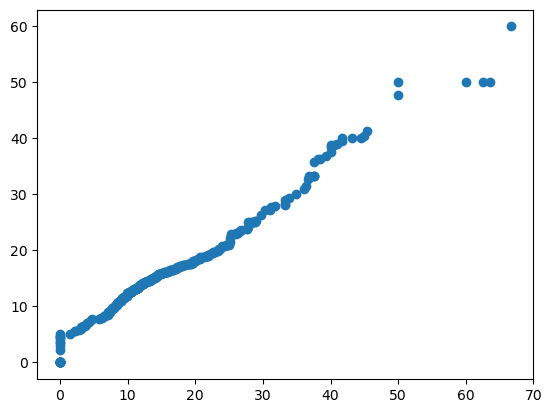

In [58]:
plt.scatter(temp3pm_df[1].iloc[:mintemp_df.shape[0]], mintemp_df[1])

In [56]:
df_with_tempdiff = df_low_corrs0.drop(['Temp3pm', 'MinTemp'],axis=1)
df_with_tempdiff.columns

Index(['Location', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am',
       'Cloud3pm', 'Month', 'RainTomorrow', 'TempDiff'],
      dtype='object')

In [57]:
df_with_tempdiff = df_with_tempdiff[list(df_with_tempdiff.columns[:-2]) + ['TempDiff', 'RainTomorrow']]

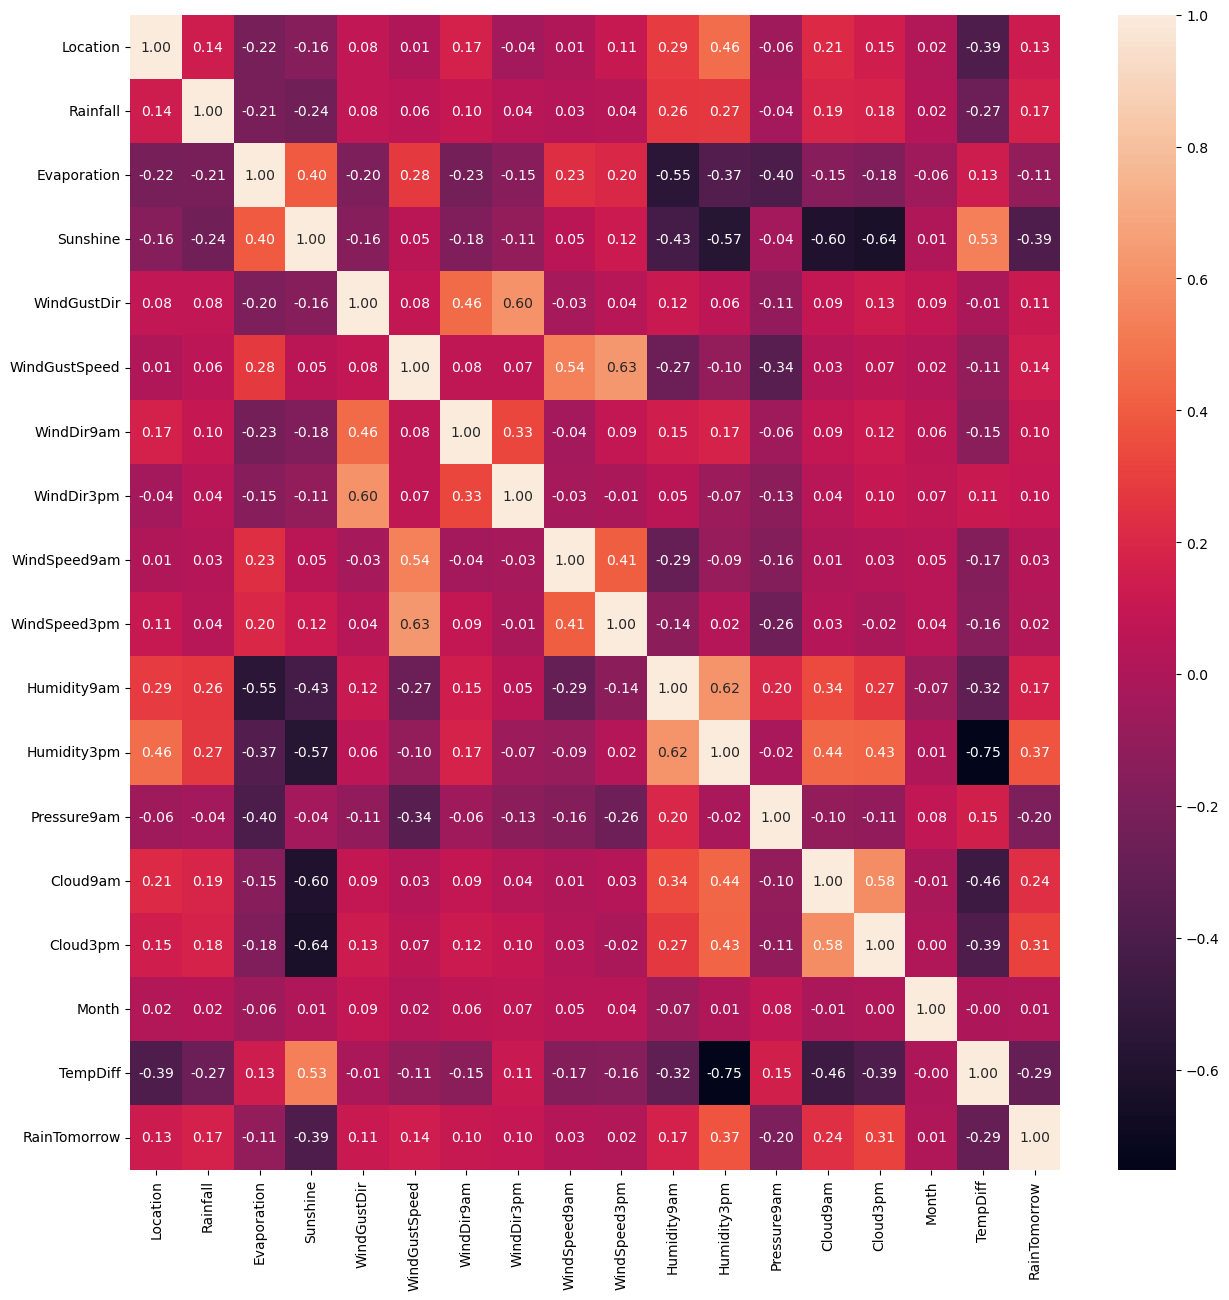

In [58]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df_with_tempdiff.corr(), annot=True, fmt='.2f') 
plt.show()

In [50]:
correlation_mat = df_with_tempdiff.corr().abs()
unstak = correlation_mat.unstack()
unstak_sorted = unstak.sort_values(kind="quicksort", ascending=False)
unstak_sorted[(unstak_sorted>0.6) & (unstak_sorted<1)]

TempDiff       Humidity3pm      0.748616
Humidity3pm    TempDiff         0.748616
Cloud3pm       Sunshine         0.634803
Sunshine       Cloud3pm         0.634803
WindSpeed3pm   WindGustSpeed    0.630115
WindGustSpeed  WindSpeed3pm     0.630115
Humidity9am    Humidity3pm      0.615846
Humidity3pm    Humidity9am      0.615846
Cloud9am       Sunshine         0.606183
Sunshine       Cloud9am         0.606183
WindDir3pm     WindGustDir      0.605218
WindGustDir    WindDir3pm       0.605218
dtype: float64

In [59]:
df_with_tempdiff.to_csv('Dataset/weatherAUS_withTempDiff.csv', index = False)

# Estudio de Correlaciones: Solucion3


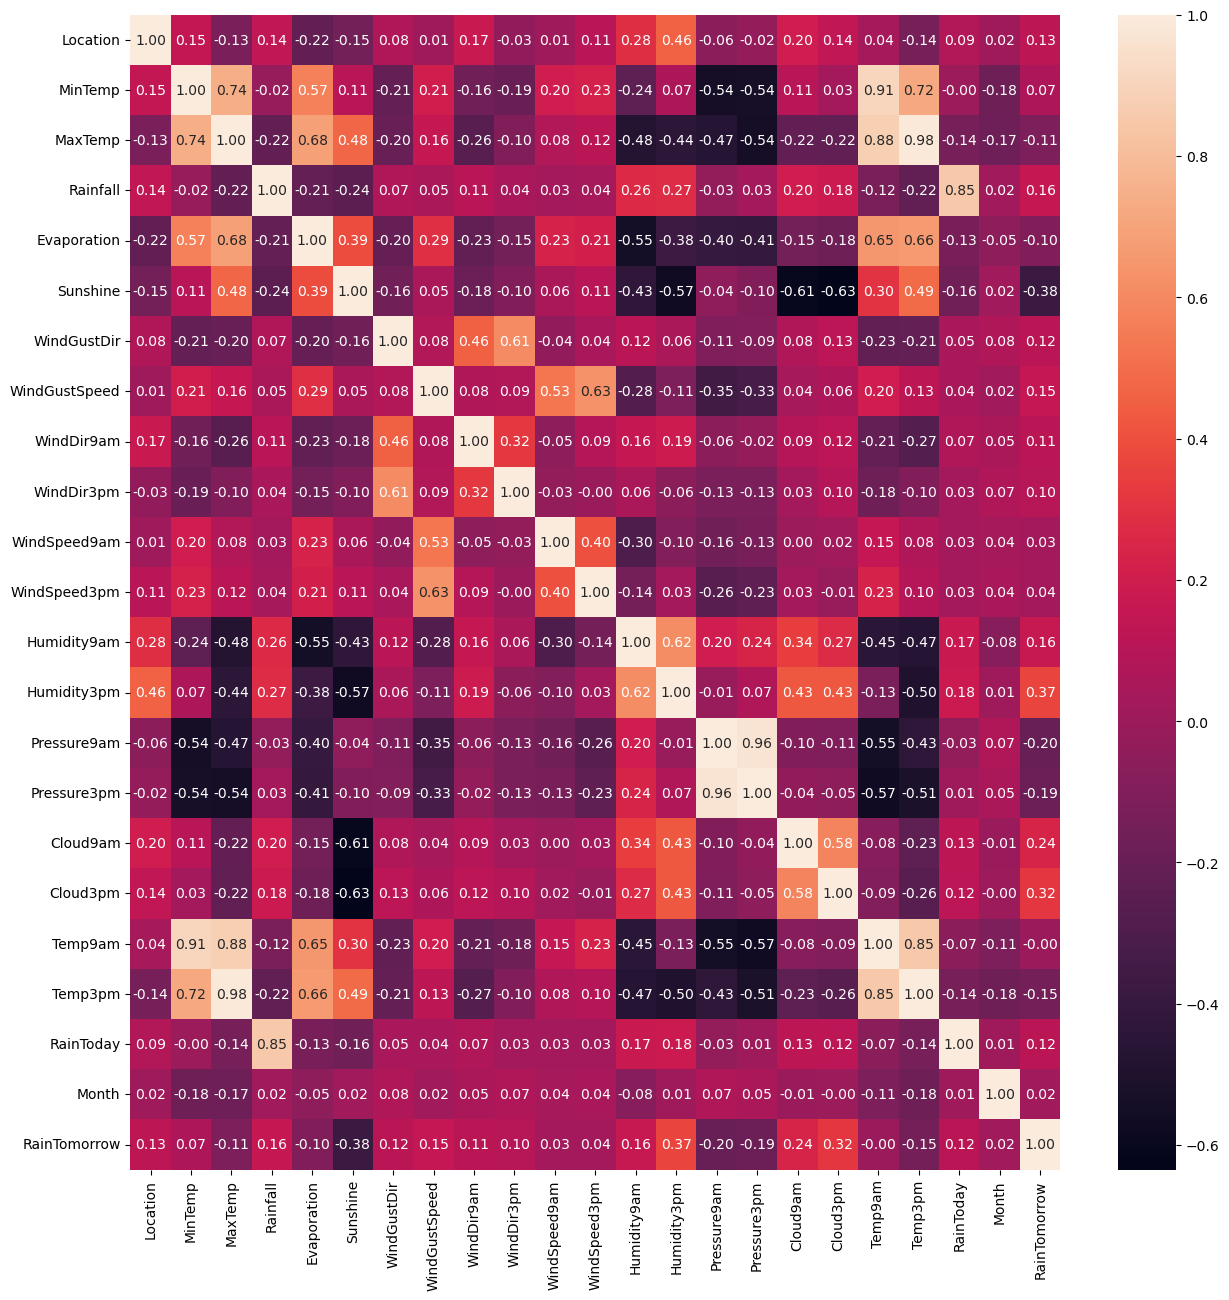

In [60]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df_labeled.corr(), annot=True, fmt='.2f') 
plt.show()

In [61]:
correlation_mat = df_labeled.corr().abs()
unstak = correlation_mat.unstack()
unstak_sorted = unstak.sort_values(kind="quicksort", ascending=False)
unstak_sorted[(unstak_sorted>0.6) & (unstak_sorted<1)]

Temp3pm        MaxTemp          0.983117
MaxTemp        Temp3pm          0.983117
Pressure9am    Pressure3pm      0.964199
Pressure3pm    Pressure9am      0.964199
Temp9am        MinTemp          0.907344
MinTemp        Temp9am          0.907344
MaxTemp        Temp9am          0.875485
Temp9am        MaxTemp          0.875485
Temp3pm        Temp9am          0.852038
Temp9am        Temp3pm          0.852038
RainToday      Rainfall         0.850849
Rainfall       RainToday        0.850849
MinTemp        MaxTemp          0.738233
MaxTemp        MinTemp          0.738233
Temp3pm        MinTemp          0.716241
MinTemp        Temp3pm          0.716241
Evaporation    MaxTemp          0.683669
MaxTemp        Evaporation      0.683669
Evaporation    Temp3pm          0.661685
Temp3pm        Evaporation      0.661685
Temp9am        Evaporation      0.652335
Evaporation    Temp9am          0.652335
Sunshine       Cloud3pm         0.634803
Cloud3pm       Sunshine         0.634803
WindSpeed3pm   W

- MaxTemp  y Temp3pm estan correlacionadas al 98%, Por lo que elimino MaxTemp ya que su correlacion con la variable a predecir es de -0.11 frente a -0.14 de Temp3pm

- MinTemp y Temp9am estan correlacionadas al 90%, siendo la correlacion con la variable a predecir mayor en MinTemp, por lo que elimino Temp9am

- Pressure9am y Presure3pm estan correlacionadas en un 98%, por lo que elimino Presure3pm, ya que su correlacion con la variable a predecir es ligeramente inferior

- RainToday y Rainfall estan correlacionadas al 85%, siendo la correlacion con la variable a predecir superior en Rainfall, por lo que elimino RainToday


In [62]:
high_corr = ['MaxTemp', 'Temp9am','Pressure3pm','RainToday' ]
low_corr = list(df_labeled.columns)
[low_corr.remove(x) for x in high_corr]
df_low_corrs = df_labeled[low_corr]
df_low_corrs0 = df_labeled0[low_corr]

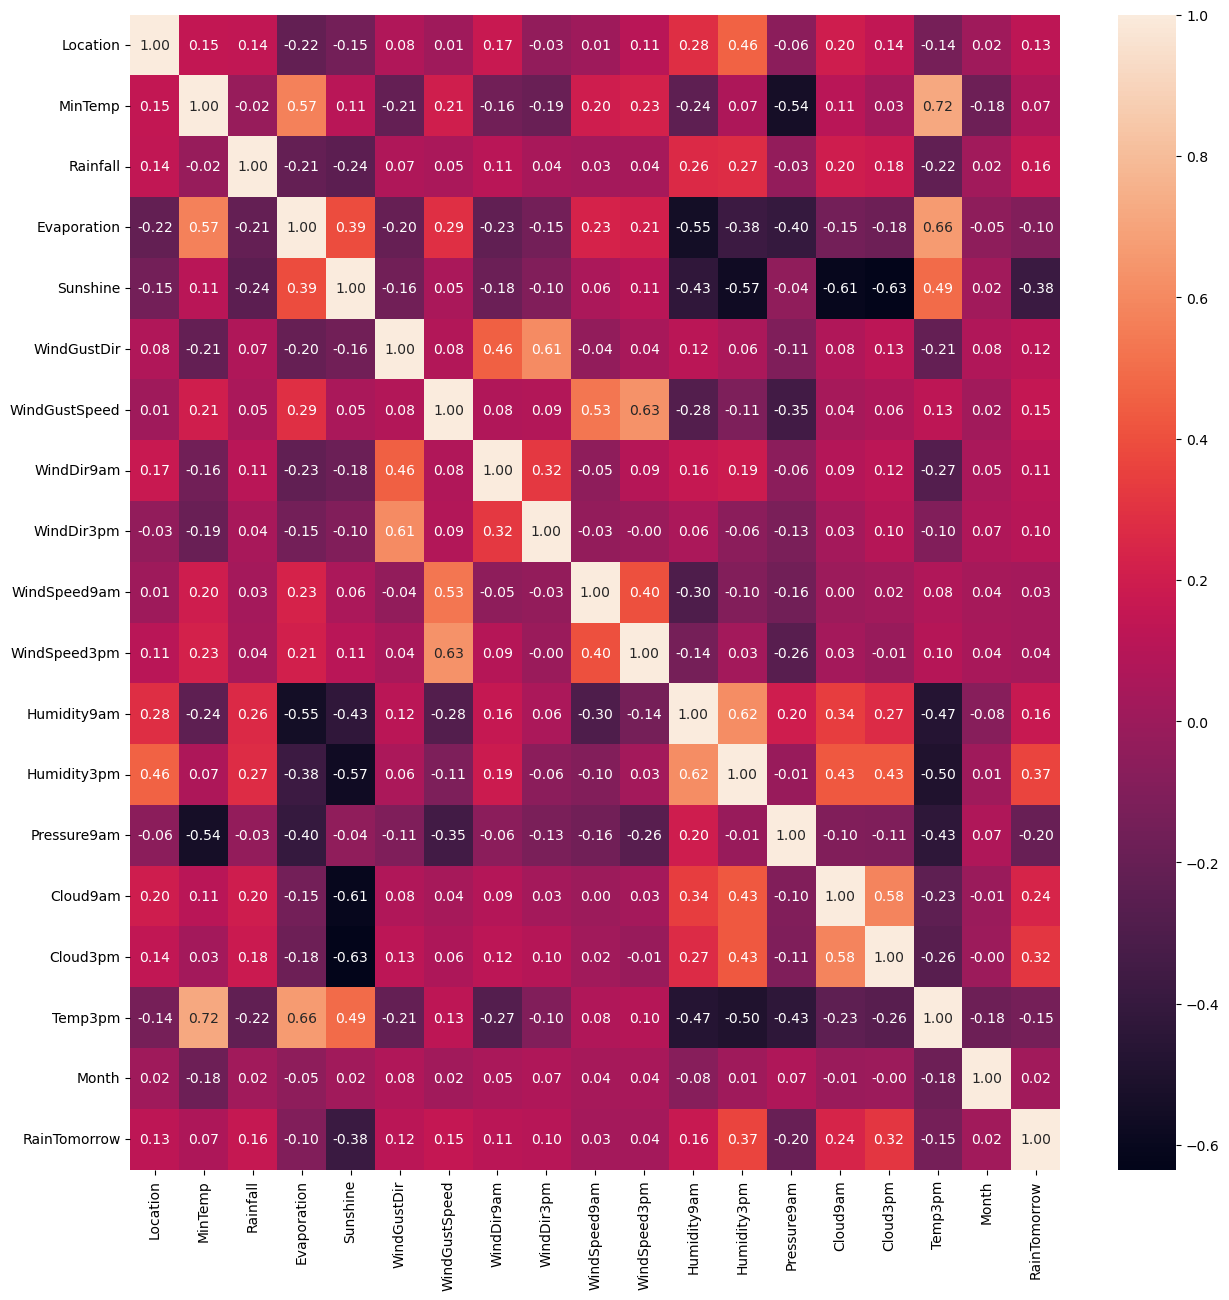

In [63]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df_low_corrs.corr(), annot=True, fmt='.2f') 
plt.show()

In [66]:
correlation_mat = df_low_corrs0.corr().abs()
unstak = correlation_mat.unstack()
unstak_sorted = unstak.sort_values(kind="quicksort", ascending=False)
unstak_sorted[(unstak_sorted>0.6) & (unstak_sorted<1)]

MinTemp        Temp3pm          0.712449
Temp3pm        MinTemp          0.712449
               Evaporation      0.661799
Evaporation    Temp3pm          0.661799
Cloud3pm       Sunshine         0.635034
Sunshine       Cloud3pm         0.635034
WindSpeed3pm   WindGustSpeed    0.628471
WindGustSpeed  WindSpeed3pm     0.628471
Humidity3pm    Humidity9am      0.616018
Humidity9am    Humidity3pm      0.616018
WindGustDir    WindDir3pm       0.604313
WindDir3pm     WindGustDir      0.604313
Cloud9am       Sunshine         0.604012
Sunshine       Cloud9am         0.604012
dtype: float64

In [67]:
df_low_corrs0.to_csv('Dataset/weatherAUS_both.csv', index = False)